In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\SUDEV DAS P\Downloads\House_Rent_Train.xlsx")

In [3]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(20555, 25)

In [5]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [7]:
df.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20532.000000,20532.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,12.945748,77.637295,0.227049,0.362053,0.174848,0.711603,1062.017465,5.769920,1.858465,4.549922,1.874050,3.801335,1.149523,19056.733148
std,0.029601,0.110525,0.418935,0.480606,0.379846,0.453028,591.207446,6.350989,0.710926,335.154787,2.183982,3.183697,0.993549,8434.029016
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918176,77.572068,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943790,77.633506,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970979,77.695723,0.000000,1.000000,0.000000,1.000000,1285.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


# Data Cleaning

Let's drop the column since it has no relevance in analysis.

In [8]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [9]:
df['amenities']

0        {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
1        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
2        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
3        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
4        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
                               ...                        
20550                                                  NaN
20551                                                  NaN
20552                                                  NaN
20553                                                  NaN
20554                                                  NaN
Name: amenities, Length: 20555, dtype: object

In [10]:
df.drop('id',axis = 1, inplace=True)

In [11]:
df[df.duplicated()].shape

(40, 24)

There are 40 duplicate rows. We should remove them

In [12]:
df.drop_duplicates()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20542,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20544,BHK1,NaN,NaN,NaN,NaN,NaN,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20545,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20546,BHK1,NaN,NaN,NaN,NaN,NaN,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isnull().sum()

type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

Dropping rows with huge number of null values since these values cannot be imputed and hence these data cannot be used for any analysis

In [14]:
df.isnull().sum(axis=1).value_counts()

0     20377
1       155
16       14
17        9
dtype: int64

In [15]:
df = df[df.isnull().sum(axis = 1)<15]

In [16]:
df

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,NaN,"Gattigere,RR Nagar",13-12-2017 18:08,12.925380,77.524397,ANYONE,1,1,1,1,...,3.0,E,3.0,4.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,25000.0
20528,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [17]:
df.isnull().sum()

type                18
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [18]:
df['amenities']

0        {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
1        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
2        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
3        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
4        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
                               ...                        
20527    {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
20528    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
20529    {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
20530    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
20531    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
Name: amenities, Length: 20532, dtype: object

In [19]:
df['amenities'] = df['amenities'].apply(json.loads)

In [20]:
type(df['amenities'][0])

dict

In [21]:
amenities_count = []
def count_amenities(row):
    count = 0
    for k in row.keys():
        if row[k]:
            count+=1
    amenities_count.append(count)
    return amenities_count

In [22]:
df['amenities_count'] = df['amenities'].apply(count_amenities)[0]

In [23]:
normalized_df = pd.json_normalize(df['amenities'])

In [24]:
normalized_df

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,True,True,True,False,True,True,True,True,True,False,True,True,True,False,True,True,False,True,True
1,True,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,True
2,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,True,True,True,False,False,True,True,True,False,False,True,True,False,False,False,False,False,True,True
20528,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
20529,True,True,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
20530,True,False,True,False,False,False,False,True,True,False,True,True,False,True,False,False,True,True,True


In [25]:
df = pd.concat([df,normalized_df], axis=1)

In [26]:
type(df['amenities'][0])

dict

In [27]:
df.drop('amenities',axis=1, inplace = True)

In [28]:
df.isnull().sum()

type                 18
locality            137
activation_date       0
latitude              0
longitude             0
lease_type            0
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
rent                  0
amenities_count       0
LIFT                  0
GYM                  62
INTERNET              0
AC                    0
CLUB               1067
INTERCOM              0
POOL                  0
CPA                1067
FS                    0
SERVANT            1067
SECURITY              0
SC                    0
GP                 1067
PARK                  0
RWH                1067
STP                1067
HK                    0
PB              

In [29]:
df.drop(['LIFT','GYM','POOL'],axis=1,inplace=True)

Let's clean the columns one by one.

### Type

In [30]:
df['type'].value_counts()

BHK2        11671
BHK3         4387
BHK1         3607
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [31]:
df.replace({'bhk2':'BHK2','bhk3':'BHK3','1BHK1':'BHK1','BHK4PLUS':'BHK4+'},inplace=True)

In [32]:
df['type'].value_counts()

BHK2     11687
BHK3      4399
BHK1      3611
RK1        553
BHK4       233
BHK4+       31
Name: type, dtype: int64

In [33]:
df['bathroom'] = df['bathroom'].astype('int')

In [34]:
df[['type','bathroom']]

,type,bathroom
0,BHK2,2
1,BHK2,2
2,BHK3,3
3,BHK1,1
4,BHK3,3
...,...,...
20527,NaN,3
20528,BHK2,2
20529,BHK2,2
20530,BHK2,2


In [35]:
df[df['type'].isnull()]

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
20486,NaN,Whitefield,2018-02-01 14:41:00,12.978994,77.752149,ANYONE,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
20487,NaN,Jayanagar,22-11-2017 15:50,12.938239,77.584256,ANYONE,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
20488,NaN,Sarjapur Road Wipro To Railway Crossing,2017-12-08 13:40:00,12.905571,77.701797,FAMILY,1,1,0,0,...,True,True,True,True,False,True,False,True,True,True
20493,NaN,"Someshwara Layout,Doddakannelli",22-01-2018 16:58,12.904160,77.691874,ANYONE,1,1,0,0,...,False,True,False,False,False,False,False,False,False,False
20494,NaN,"Seetharampalya,Hoodi",2017-10-07 17:15:00,12.985818,77.711033,FAMILY,1,1,1,1,...,False,True,True,True,False,False,False,True,True,True
20495,NaN,"Gattigere,RR Nagar",13-12-2017 18:08,12.925380,77.524397,ANYONE,1,1,1,1,...,False,True,True,False,False,False,False,False,True,True
20502,NaN,Whitefield,2018-02-01 14:41:00,12.978994,77.752149,ANYONE,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
20503,NaN,Jayanagar,22-11-2017 15:50,12.938239,77.584256,ANYONE,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
20504,NaN,Sarjapur Road Wipro To Railway Crossing,2017-12-08 13:40:00,12.905571,77.701797,FAMILY,1,1,0,0,...,True,True,True,True,False,True,False,True,True,True
20509,NaN,"Someshwara Layout,Doddakannelli",22-01-2018 16:58,12.904160,77.691874,ANYONE,1,1,0,0,...,False,True,False,False,False,False,False,False,False,False


We can impute null values in type column by looking at the number of bathrroms

In [36]:
def fill_type(row):
    if pd.isna(row['type']) :
        return f"BHK{row['bathroom']}"
    return row['type']

In [37]:
df['type'] = df.apply(fill_type, axis=1)

In [38]:
df['type'].isnull().sum()

0

In [39]:
df['type'].value_counts()

BHK2     11693
BHK3      4411
BHK1      3611
RK1        553
BHK4       233
BHK4+       31
Name: type, dtype: int64

### Locality

In [40]:
df['locality'].value_counts().tail(50)

Jai Bheema Nagar                                                                                                      1
DSR TOPAZ, Green Glen Layout, Bellandur, Bengaluru, Karnataka, India                                                  1
Kaggadasapura Main Road, Kaggadasapura, Bengaluru, Karnataka, India                                                   1
1741, 9th Cross Road, JP Nagar, Bengaluru, Karnataka, India                                                           1
Cubbonpete, Nagarathpete, Bengaluru, Karnataka, India                                                                 1
T R Nagar                                                                                                             1
Koramangala, 1st Block Koramangala                                                                                    1
Gavipuram Extention                                                                                                   1
Banashakari                             

There are some null values and some locality is givenas whole address. We chould deal with this

In [41]:
df.columns

Index(['type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'amenities_count', 'INTERNET',
       'AC', 'CLUB', 'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [42]:
# pip install geopy

In [43]:
# df

In [44]:
# locations = df[df['locality'].isnull()][['locality','latitude','longitude']]

In [45]:
# locations

In [46]:
from geopy.geocoders import Nominatim

In [47]:
import reverse_geocoder as rg

batch_size = 1000  

for i in range(0, len(df), batch_size):
    coordinates = list(zip(df['latitude'][i:i+batch_size], df['longitude'][i:i+batch_size]))
    results = rg.search(coordinates)  
    
    for j, result in enumerate(results):
        suburb = result.get('admin2', None)  
        if suburb:
            df.loc[i + j, 'locality'] = suburb


Loading formatted geocoded file...


In [48]:
df['locality'].value_counts()

Bangalore Urban    18087
Bangalore Rural     2407
Kancheepuram          20
Kolar                 16
Chennai                2
Name: locality, dtype: int64

### Activation Date

In [49]:
df['activation_date'] = pd.to_datetime(df['activation_date'])

In [50]:
df.activation_date.nunique()

19566

In [51]:
df['activation_date'].isnull().sum()

0

In [52]:
df['activation_date'].value_counts()

2017-04-11 18:11:00    4
2018-08-07 22:31:00    3
2018-07-04 18:04:00    3
2018-01-27 12:06:00    3
2018-11-07 18:20:00    3
                      ..
2017-02-08 15:44:00    1
2018-06-19 14:15:00    1
2017-04-08 21:13:00    1
2018-01-29 17:41:00    1
2018-06-14 11:50:00    1
Name: activation_date, Length: 19566, dtype: int64

In [53]:
df['activation_date'] = df['activation_date'].apply(lambda x: x.year)

In [54]:
df['activation_date'].value_counts()

2018    13073
2017     7459
Name: activation_date, dtype: int64

In [55]:
df['years_since_activation'] = df['activation_date'].apply(lambda x : 2023-x)

### Latitude and Longitude

In [56]:
df['latitude'].isnull().sum()

0

In [57]:
df['longitude'].isnull().sum()

0

In [58]:
df['latitude'].describe()

count    20532.000000
mean        12.945748
std          0.029601
min         12.900004
25%         12.918176
50%         12.943790
75%         12.970979
max         12.999999
Name: latitude, dtype: float64

In [59]:
df['longitude'].describe()

count    20532.000000
mean        77.637295
std          0.110525
min         77.500072
25%         77.572068
50%         77.633506
75%         77.695723
max         80.266346
Name: longitude, dtype: float64

### Lease Type

In [60]:
df['lease_type'].value_counts()

FAMILY      10190
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: lease_type, dtype: int64

In [61]:
df['lease_type'].isnull().sum()

0

### Gym

In [62]:
df["gym"].value_counts()

0    15874
1     4658
Name: gym, dtype: int64

In [63]:
df['gym'].isnull().sum()

0

### Lift

In [64]:
df['lift'].value_counts()

0    13104
1     7428
Name: lift, dtype: int64

In [65]:
df['lift'].isnull().sum()

0

### Swimming Pool

In [66]:
df['swimming_pool'].value_counts()

0    16942
1     3590
Name: swimming_pool, dtype: int64

### Negotiable

In [67]:
df['negotiable'].value_counts()

1    14610
0     5922
Name: negotiable, dtype: int64

### Furnishing

In [68]:
df.furnishing.value_counts()

SEMI_FURNISHED     17927
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: furnishing, dtype: int64

### Parking

In [69]:
df['parking'].value_counts()

BOTH            10823
TWO_WHEELER      7219
FOUR_WHEELER     1448
NONE             1042
Name: parking, dtype: int64

### Property Size

In [70]:
df.property_size.describe()

count    20532.000000
mean      1061.938145
std        591.320502
min          1.000000
25%        700.000000
50%       1047.000000
75%       1284.000000
max      50000.000000
Name: property_size, dtype: float64

<AxesSubplot:xlabel='property_size'>

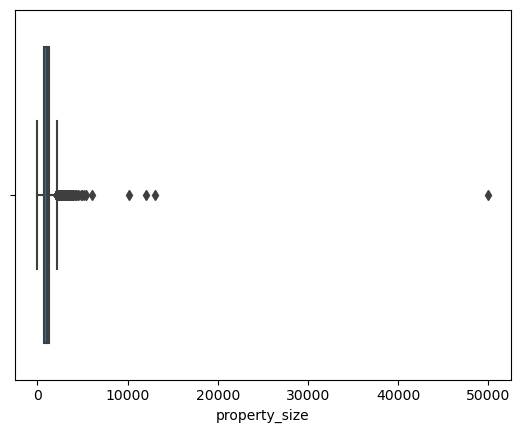

In [71]:
sns.boxplot(df['property_size'])

There are some outiliers in this column

### Property Age

In [72]:
df['property_age'].value_counts()

 0.0      3340
 10.0     2866
 5.0      2761
 1.0      2120
 3.0      1905
 2.0      1326
 4.0       984
 8.0       958
 7.0       828
 6.0       776
 15.0      776
 20.0      414
 12.0      342
 9.0       328
 25.0      128
 13.0      103
 11.0      100
 30.0      100
 14.0       82
 18.0       59
 16.0       42
 17.0       42
-1.0        33
 40.0       17
 22.0       15
 50.0       12
 19.0       11
 21.0       11
 35.0        9
 23.0        8
 27.0        6
 34.0        5
 45.0        4
 24.0        4
 28.0        3
 26.0        3
 33.0        3
 100.0       2
 37.0        1
 42.0        1
 60.0        1
 80.0        1
 49.0        1
 400.0       1
Name: property_age, dtype: int64

In [73]:
df.property_age.describe()

count    20532.000000
mean         5.769920
std          6.350989
min         -1.000000
25%          1.000000
50%          5.000000
75%         10.000000
max        400.000000
Name: property_age, dtype: float64

In [74]:
df[df['property_age']>20]['activation_date']

0        2018
85       2017
107      2018
116      2018
224      2018
         ... 
20354    2018
20386    2017
20492    2017
20508    2017
20524    2017
Name: activation_date, Length: 336, dtype: int64

<AxesSubplot:xlabel='property_age'>

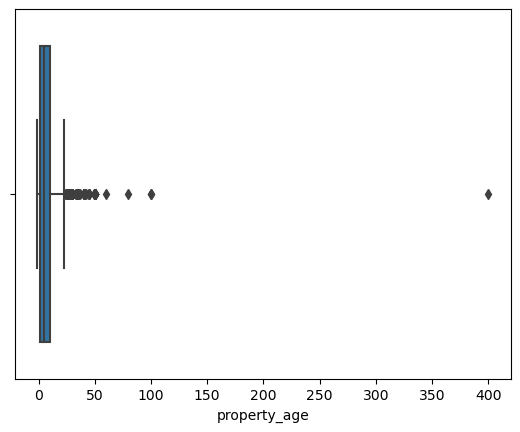

In [75]:
sns.boxplot(df['property_age'])

There are some outliers in this column too.


### Bathroom

In [76]:
df['bathroom'].value_counts()

2     11298
1      6262
3      2647
4       287
5        33
6         3
21        1
7         1
Name: bathroom, dtype: int64

In [77]:
df[df['bathroom']==21]

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP,years_since_activation
2431,BHK3,Bangalore Urban,2018,12.945015,77.628737,BACHELOR,0,0,0,1,...,True,False,False,False,False,False,False,False,False,5


In [78]:
# It is not acceptable that a BHK3 apartment has 21 bathrooms. This is a data error so it should be handled. Replace it with mode of number of bathrooms for BHK3
df['bathroom'].replace({21:3},inplace=True)

In [79]:
df.bathroom.value_counts()

2    11298
1     6262
3     2648
4      287
5       33
6        3
7        1
Name: bathroom, dtype: int64

### Facing

In [80]:
df['facing'].value_counts()

E     9534
N     5925
W     2632
S     1219
NE     817
SE     197
NW     149
SW      59
Name: facing, dtype: int64

### Cup Boards

In [81]:
df['cup_board'].value_counts()

2.0        8590
3.0        3793
1.0        3748
0.0        1875
4.0        1314
5.0         447
6.0         426
8.0         114
7.0          77
10.0         75
9.0          36
12.0         17
15.0          6
11.0          5
20.0          4
16.0          2
13.0          1
40.0          1
48026.0       1
Name: cup_board, dtype: int64

In [82]:
df['cup_board'].describe()

count    20532.000000
mean         4.549922
std        335.154787
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max      48026.000000
Name: cup_board, dtype: float64

In [83]:
# Replacing the large values for cup boards which seems impossible in a rental home
cupboard = df[df['cup_board']>16][['type','cup_board']]
for i,c in cupboard.iterrows():
    df['cup_board'][i] = df[df['type']==c['type']]['cup_board'].mode(1)
    
    

In [84]:
df['cup_board'].value_counts()

2.0     8593
3.0     3795
1.0     3748
0.0     1875
4.0     1314
5.0      448
6.0      426
8.0      114
7.0       77
10.0      75
9.0       36
12.0      17
15.0       6
11.0       5
16.0       2
13.0       1
Name: cup_board, dtype: int64

In [85]:
df.cup_board.nunique()

16

### Floor & Total Floor

In [86]:
df['floor'].value_counts()

1.0     5885
0.0     4987
2.0     4545
3.0     2593
4.0     1193
5.0      297
6.0      205
7.0      187
9.0      132
8.0      121
10.0     103
11.0      86
12.0      58
14.0      44
13.0      31
15.0      23
16.0      17
17.0       9
19.0       6
18.0       5
20.0       3
25.0       1
22.0       1
Name: floor, dtype: int64

In [87]:
df[df['floor']>df['total_floor']][['floor','total_floor']]

,floor,total_floor
1087,4.0,1.0
2123,3.0,0.0
4551,3.0,2.0
7369,10.0,4.0
10085,3.0,0.0
11716,2.0,0.0
14855,3.0,1.0
15921,1.0,0.0
18888,3.0,2.0


In [88]:
# Total floors cannot be greater than floor, so we need t0 replace floor value for such data points
floor_index = df[df['floor']>df['total_floor']][['floor','total_floor']].index
for i in floor_index:
    df['floor'][i] = df['total_floor'][i]

In [89]:
df[df['floor']>df['total_floor']][['floor','total_floor']]

,floor,total_floor


In [90]:
df.floor.nunique()

23

### Water Supply

In [91]:
df['water_supply'].value_counts()

CORP_BORE      10709
CORPORATION     6729
BOREWELL        3094
Name: water_supply, dtype: int64

### Building Type

In [92]:
df['building_type'].value_counts()

IF    9240
AP    8876
IH    2399
GC      17
Name: building_type, dtype: int64

### Balconies

In [93]:
df.balconies.value_counts()

1.0     8010
0.0     5901
2.0     4687
3.0     1594
4.0      291
5.0       41
6.0        4
10.0       3
13.0       1
Name: balconies, dtype: int64

In [94]:
df.balconies.describe()

count    20532.000000
mean         1.149523
std          0.993549
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: balconies, dtype: float64

### Internet

In [95]:
df['INTERNET'].value_counts()

True     13585
False     6947
Name: INTERNET, dtype: int64

In [96]:
df['INTERNET'] =  df['INTERNET'].replace({True:1,False:0})

In [97]:
df['INTERNET'].value_counts()

1    13585
0     6947
Name: INTERNET, dtype: int64

### AC

In [98]:
df['AC'].value_counts()

False    19654
True       878
Name: AC, dtype: int64

In [99]:
df['AC'].replace({True:1,False:0}, inplace=True)

In [100]:
df.AC.value_counts()

0    19654
1      878
Name: AC, dtype: int64

### Intercom

In [101]:
df['INTERCOM'].value_counts()

False    16564
True      3968
Name: INTERCOM, dtype: int64

In [102]:
df['INTERCOM'].replace({True:1,False:0}, inplace=True)

In [103]:
df.INTERCOM.value_counts()

0    16564
1     3968
Name: INTERCOM, dtype: int64

### Security

In [104]:
df['SECURITY'].value_counts()

False    10806
True      9726
Name: SECURITY, dtype: int64

In [105]:
df['SECURITY'].replace({True:1,False:0}, inplace=True)

In [106]:
df.SECURITY.value_counts()

0    10806
1     9726
Name: SECURITY, dtype: int64

### Park

In [107]:
df.PARK.value_counts()

True     10378
False    10154
Name: PARK, dtype: int64

In [108]:
df['PARK'].replace({True:1,False:0}, inplace=True)

In [109]:
df.PARK.value_counts()

1    10378
0    10154
Name: PARK, dtype: int64

In [110]:
df.isnull().sum()

type                         0
locality                     0
activation_date              0
latitude                     0
longitude                    0
lease_type                   0
gym                          0
lift                         0
swimming_pool                0
negotiable                   0
furnishing                   0
parking                      0
property_size                0
property_age                 0
bathroom                     0
facing                       0
cup_board                    0
floor                        0
total_floor                  0
water_supply                 0
building_type                0
balconies                    0
rent                         0
amenities_count              0
INTERNET                     0
AC                           0
CLUB                      1067
INTERCOM                     0
CPA                       1067
FS                           0
SERVANT                   1067
SECURITY                     0
SC      

### SC

In [111]:
df['SC'].value_counts()

False    10852
True      9680
Name: SC, dtype: int64

In [112]:
df['SC'] = df['SC'].map({True:1,False:0})

In [113]:
df['SC'].value_counts()

0    10852
1     9680
Name: SC, dtype: int64

### HK

In [114]:
df['HK'].value_counts()

False    16448
True      4084
Name: HK, dtype: int64

In [115]:
df['HK'] = df['HK'].map({True:1,False:0})

In [116]:
df['HK'].value_counts()

0    16448
1     4084
Name: HK, dtype: int64

### PB

In [117]:
df['PB'].value_counts()

False    13027
True      7505
Name: PB, dtype: int64

In [118]:
df['PB'] = df['PB'].map({True:1,False:0})

In [125]:
df['PB'].value_counts()

0    13027
1     7505
Name: PB, dtype: int64

In [126]:
df.isnull().sum()
df.drop(['CLUB','CPA','SERVANT','GP','RWH','STP','VP'],axis=1,inplace=True)

# EDA

## Univariate Analysis

In [127]:
categorical = df.select_dtypes(include = ['object']).columns
categorical_li = categorical.to_list()
categorical_li.extend(['gym','lift','swimming_pool','negotiable','bathroom','cup_board','balconies','INTERNET','AC','INTERCOM','SECURITY','PARK','floor','total_floor','years_since_activation','HK','PB','SC'])
categorical = pd.Index(categorical_li)

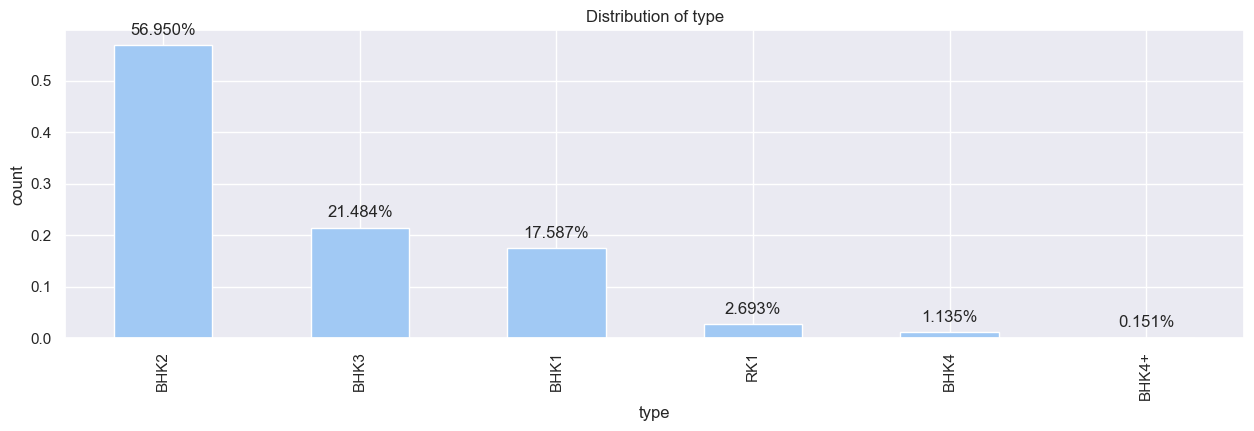

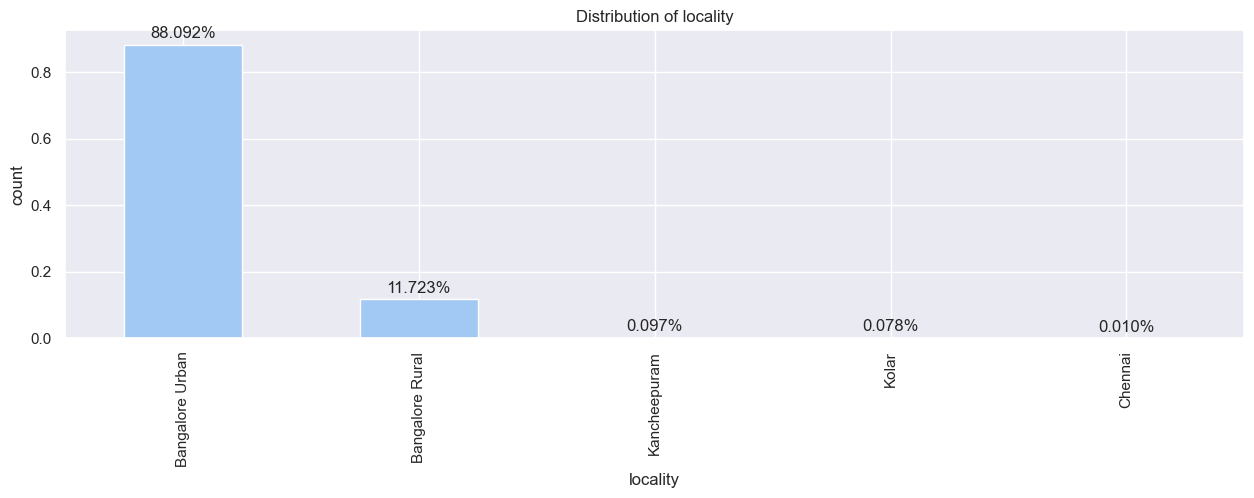

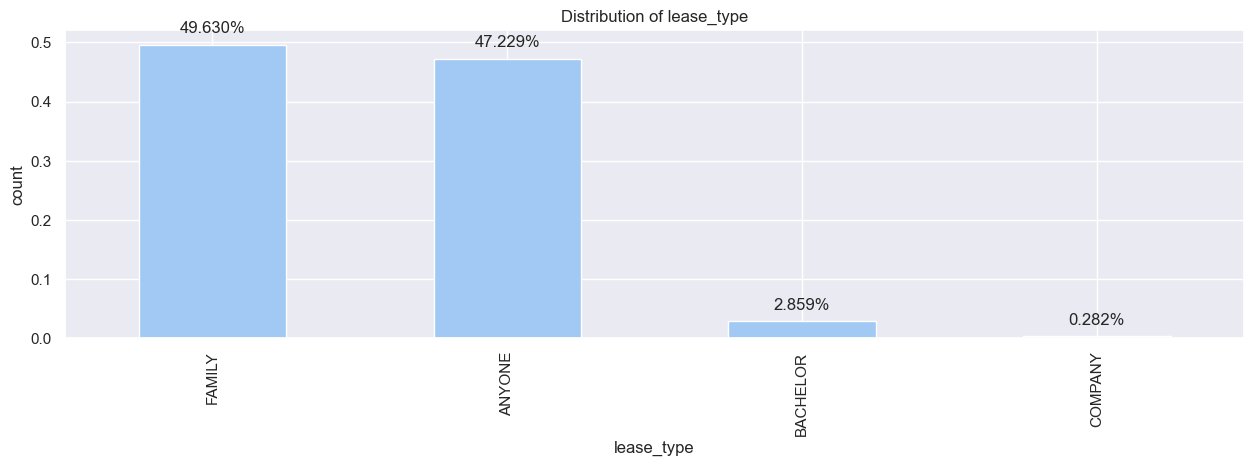

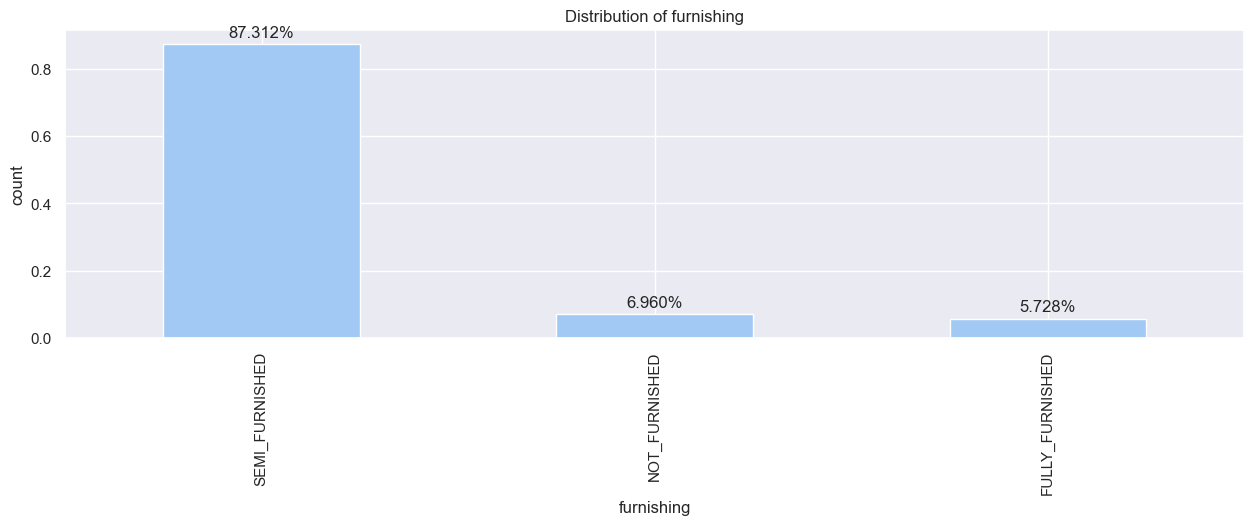

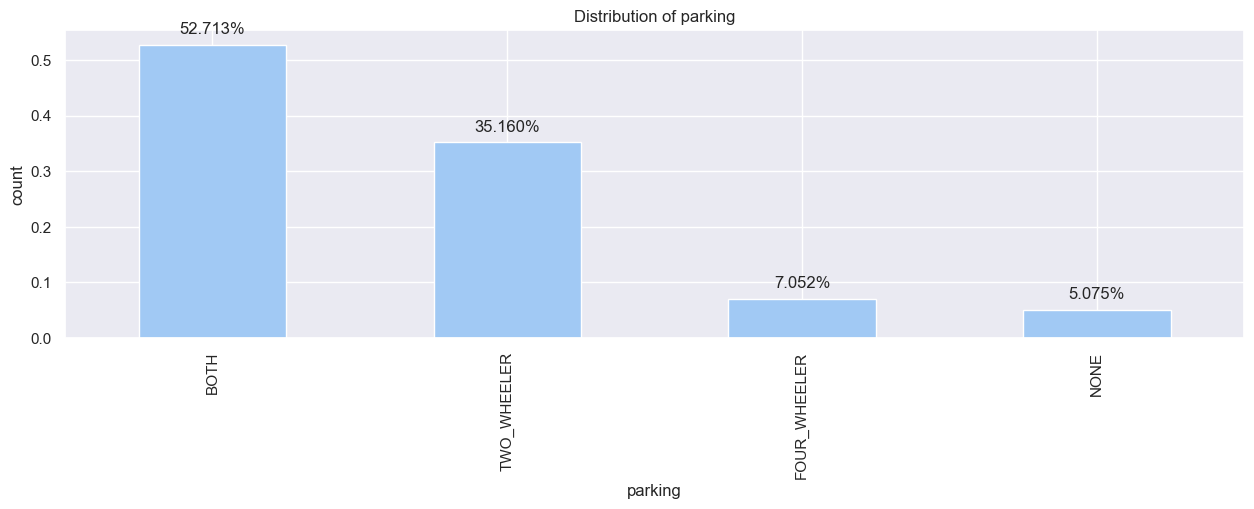

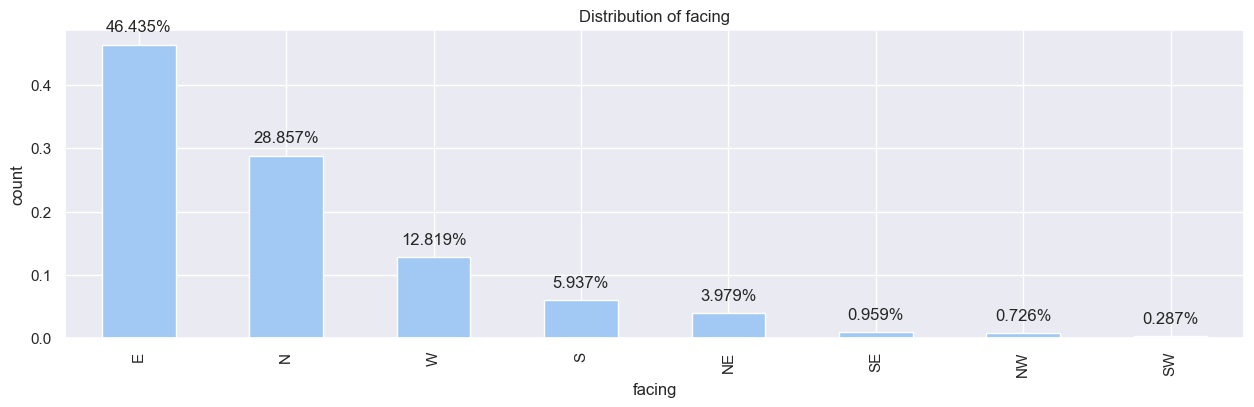

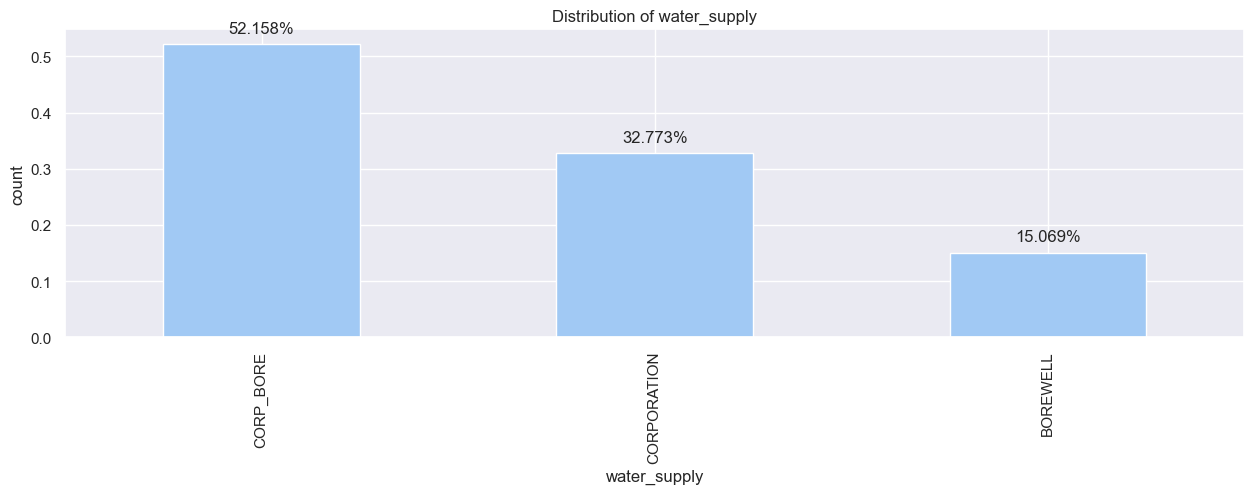

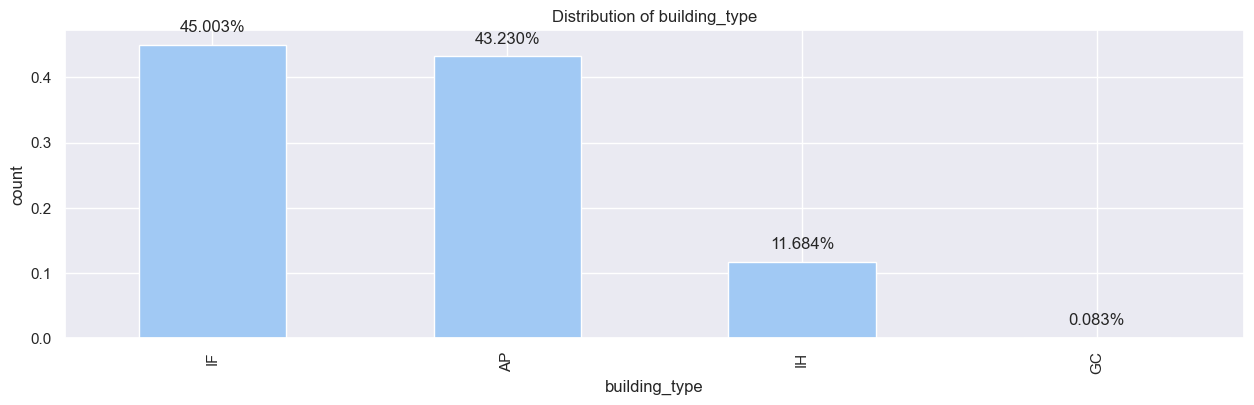

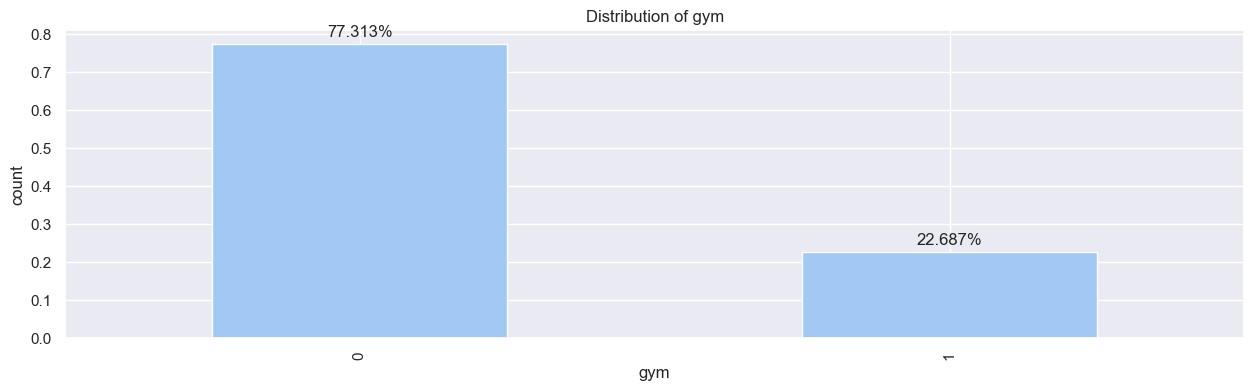

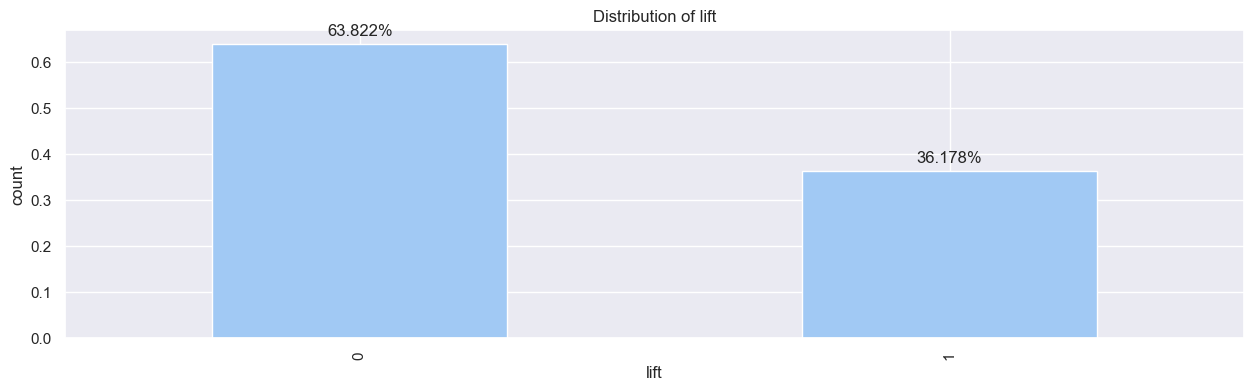

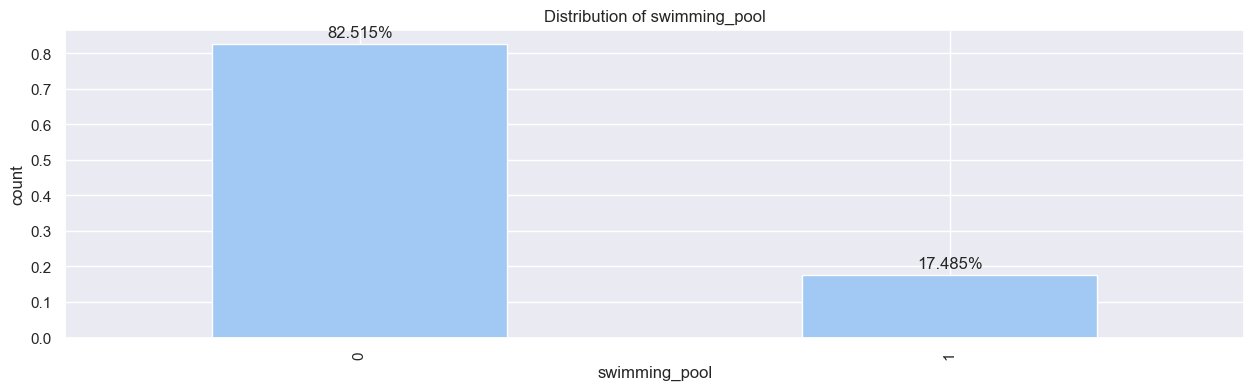

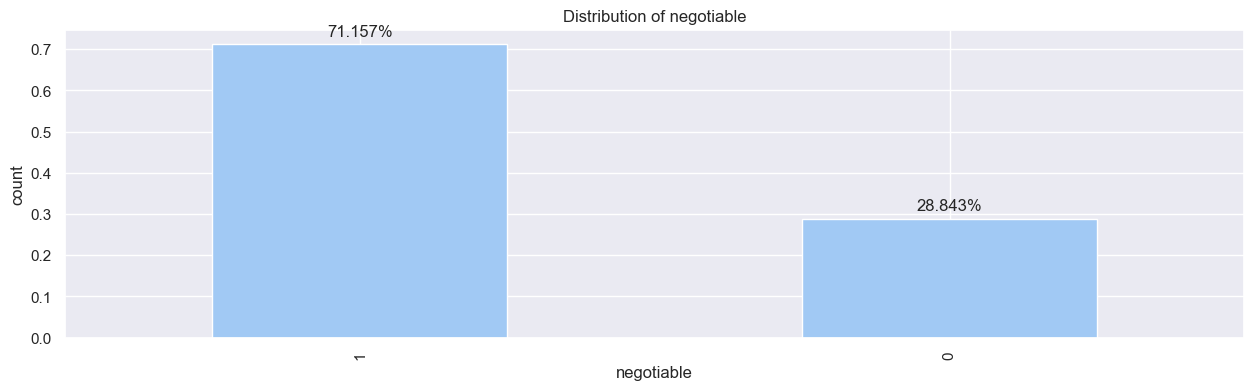

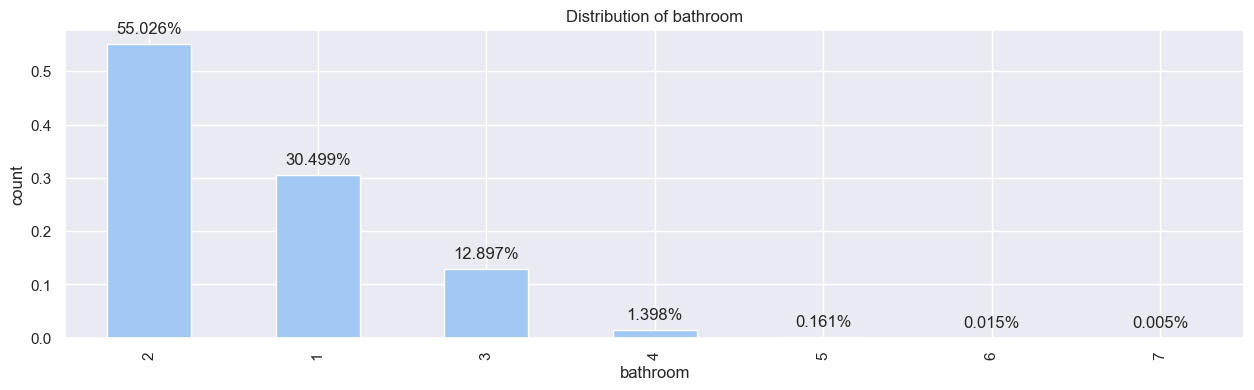

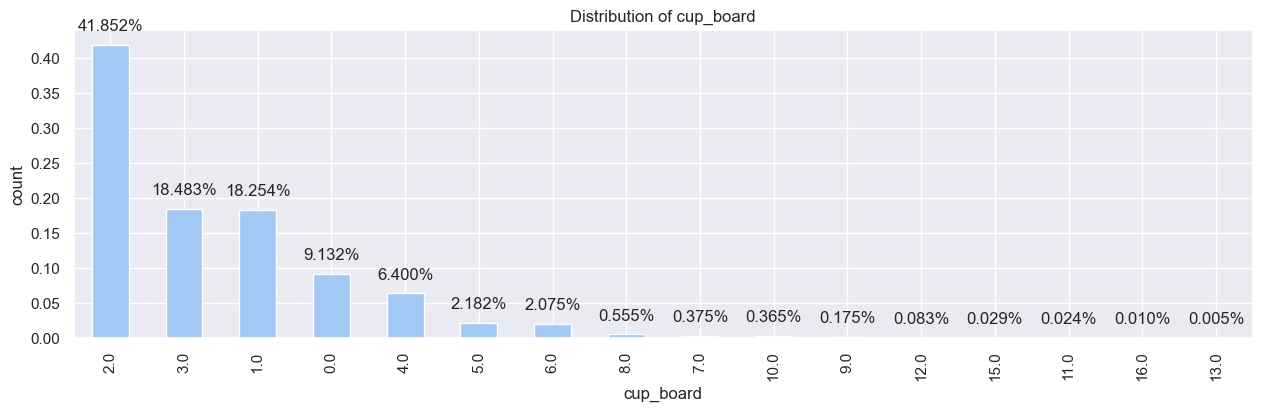

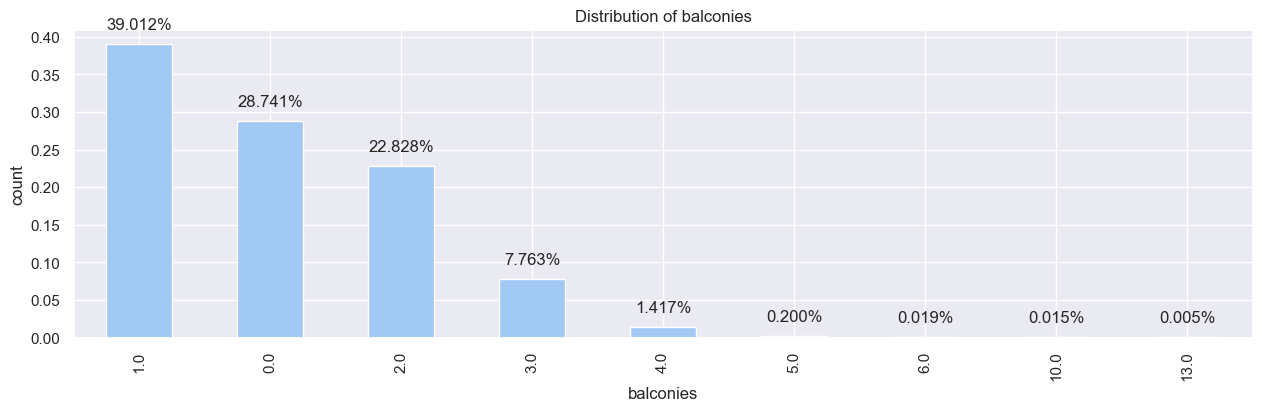

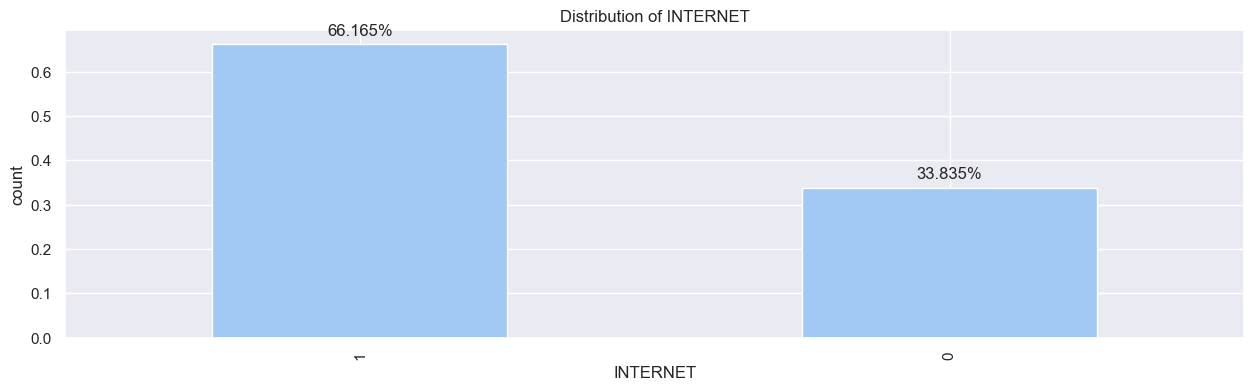

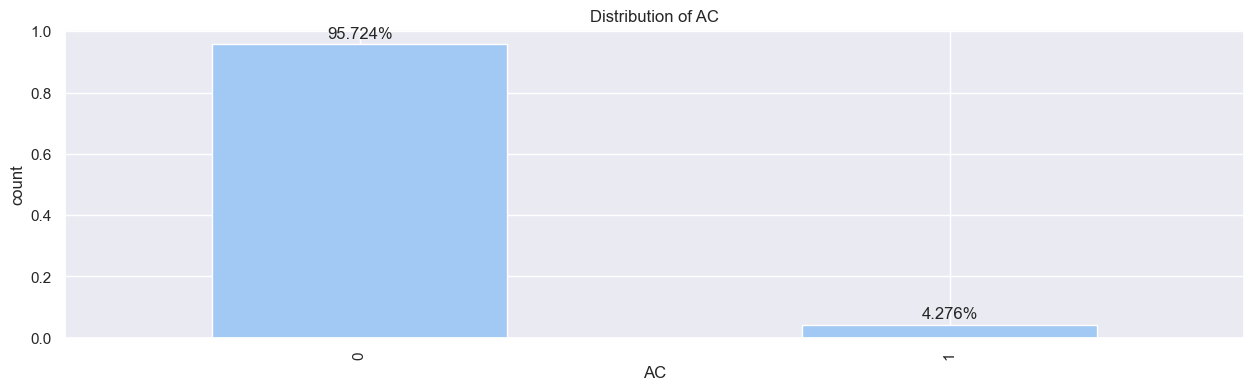

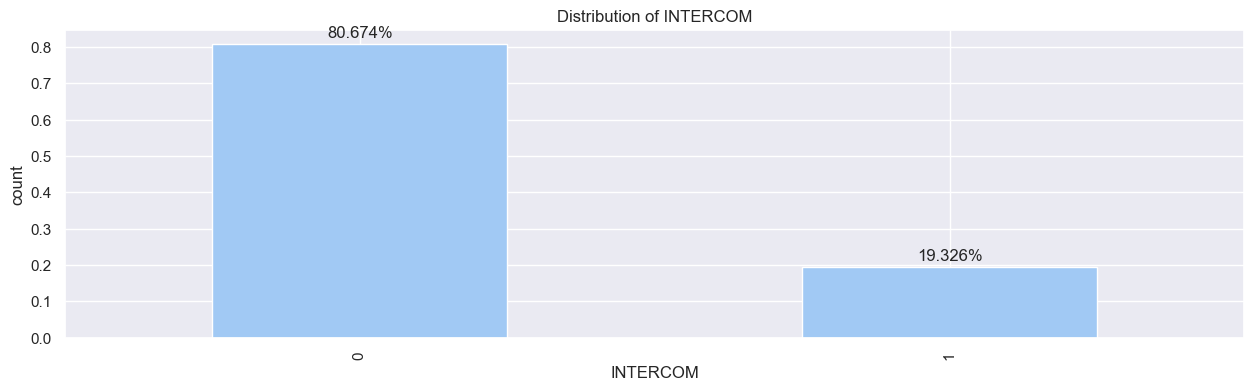

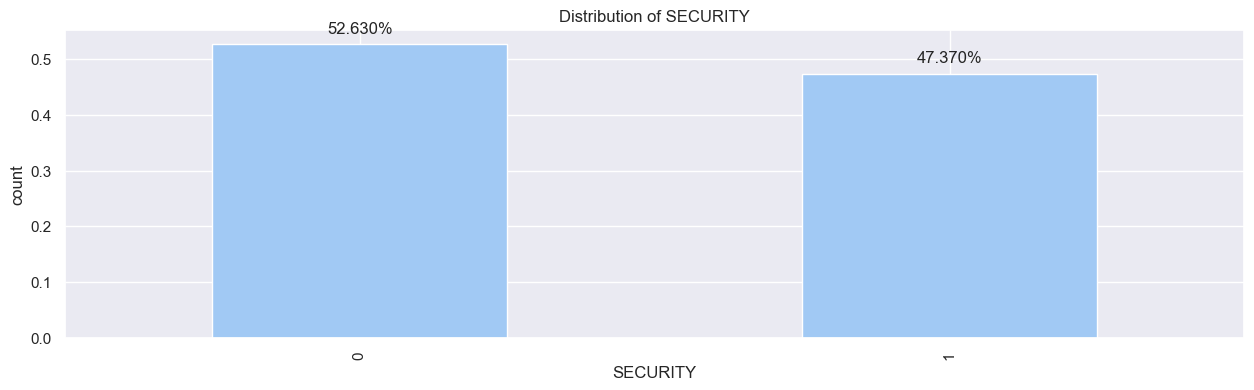

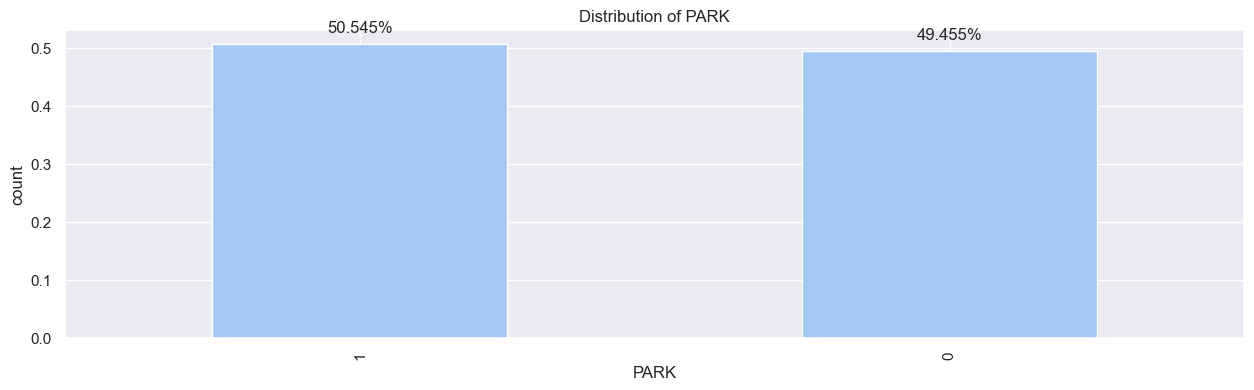

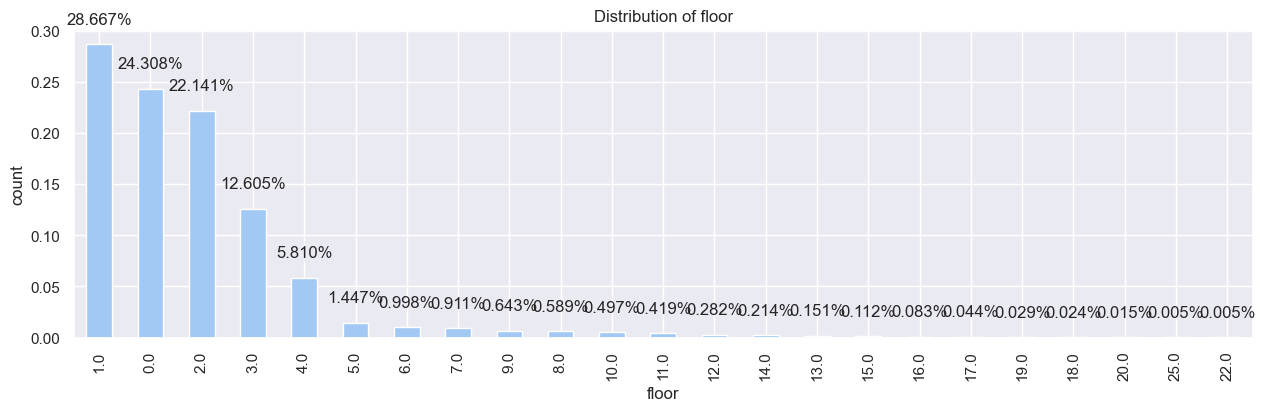

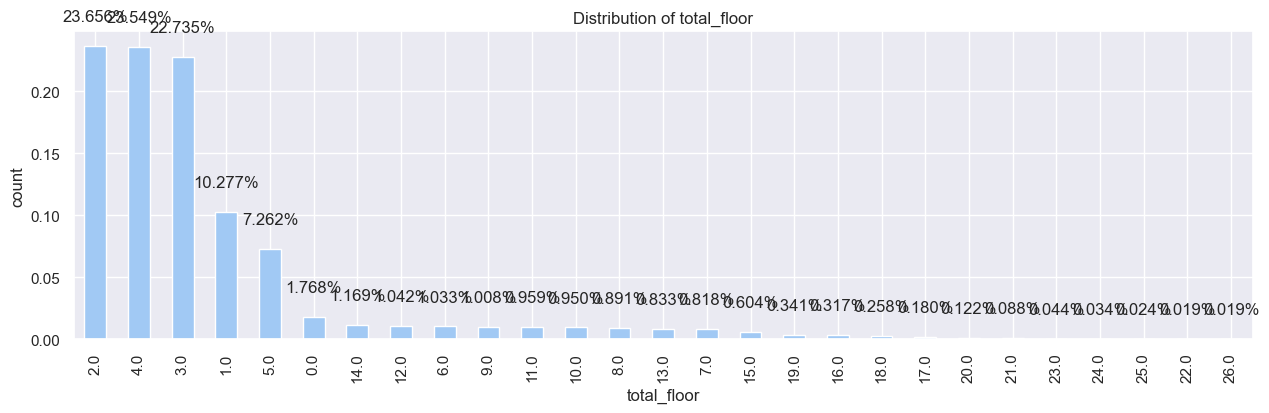

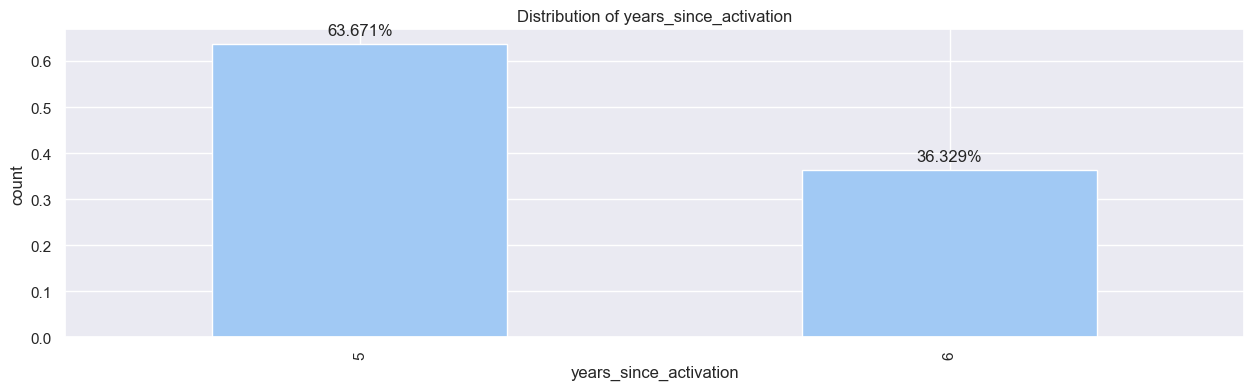

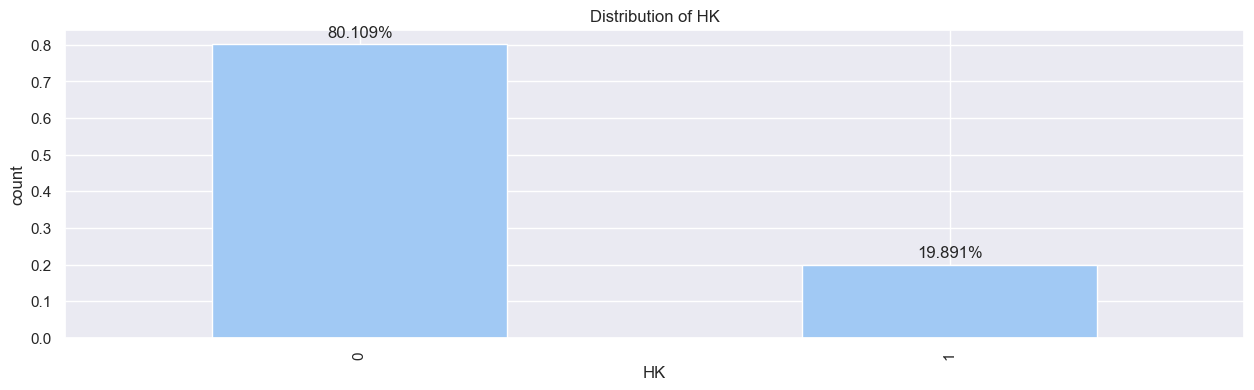

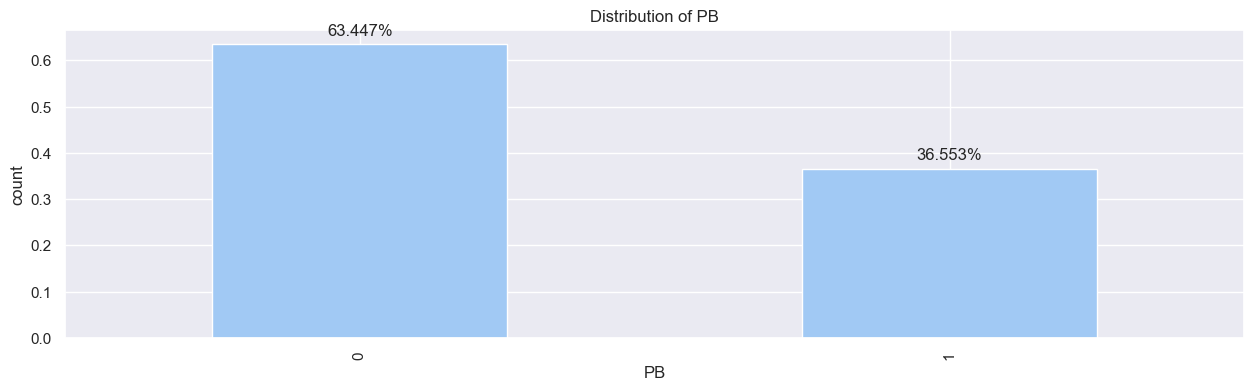

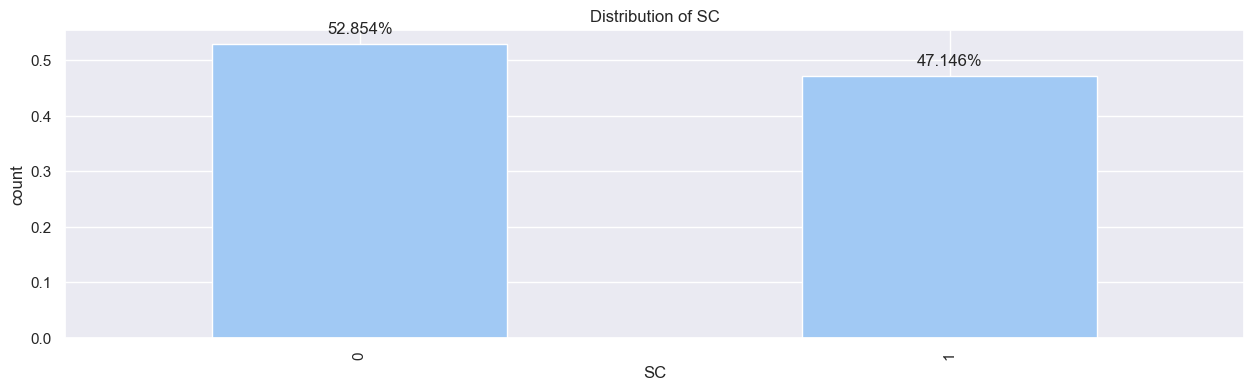

In [128]:
sns.set_theme(style='darkgrid',palette='pastel')

for column in categorical:
    plt.figure(figsize=(70,4))
    ax = plt.subplot(141)
    df[column].value_counts(normalize = True).plot(kind = "bar")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.title("Distribution of " + column)
    
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.02, f"{p.get_height()*100:.3f}%", ha="center")
        

   #### Property Type Distribution:
- Over 50% of the properties are categorized as BHK2, with BHK3 and BHK1 constituting 20% each. 
- Remaining property types collectively comprise less than 10%.
#### Geographical Distribution:
- A significant majority (88%) of the properties are situated in Bangalore Urban, while approximately 10% are located in other areas such as Kancheepuram, Kolar, and Chennai, indicating a concentration in Bangalore Urban.
#### Lease Preferences:
- Nearly half of the property owners prefer leasing to families, while a substantial number are open to leasing to any individuals. 
- Preference for leasing to bachelors and companies is relatively low.
#### Furnishing Status:
- 87% of the properties are semi-furnished, with a scarcity of fully furnished properties and unfurnished properties being comparatively rare.
#### Parking Facilities:
- Most properties offer parking for both four-wheelers and two-wheelers. 
- Roughly 35% of properties provide only two-wheeler parking, while properties without parking facilities are minimal due to lower demand.
#### Property Orientation:
- The majority of properties are oriented towards east or north directions, followed by a considerable number facing west or south. 
- Properties facing NE, SE, NW, and SW are less common.
#### Water Supply:
- Water supply for most properties is sourced from the corporation, either via borewell or directly. 
- Approximately 15% of properties have their own borewell for water supply.
#### Building Types:
- The prevalent building types are IF and AP, with GC type properties being relatively few in number.
#### Amenities:
- Gym facilities are scarce,may be it is primarily found in high-end properties.
- Lifts are not prevalent, possibly due to properties having fewer floors.
- Swimming pools are a luxury amenity, so it is available in very few properties.
#### Rent & Facilities:
- Most properties offer negotiable rents.
- The majority feature two bathrooms and two cupboards, with properties having more than three bathrooms or four cupboards being rare.
- Around 29% of properties lack balconies, while those with more than three balconies are infrequent.
- Internet facilities are available in 66% of the properties, catering to the modern need for connectivity.
- Only 4% of the properties are equipped with AC, possibly due to Bangalore's generally pleasant climate.
- Intercom facilities are present in approximately 20% of the properties.
#### Security & Recreational Facilities:
- Approximately half of the properties provide security services.
- Half of the properties feature a park within the premises, enhancing recreational options for residents.
#### Building Structure:
- The majority of properties are situated on the first floor or ground floor, while properties above the fourth floor are relatively scarce.
- Most buildings consist of two floors, with only a small percentage having more than five floors.

In [129]:
numerical = df.select_dtypes(include = ['float','int']).columns

In [130]:
numerical = numerical.drop(['gym','lift','swimming_pool','negotiable','bathroom','cup_board','balconies','INTERNET','AC','INTERCOM','SECURITY','PARK','floor','total_floor','years_since_activation','activation_date'])

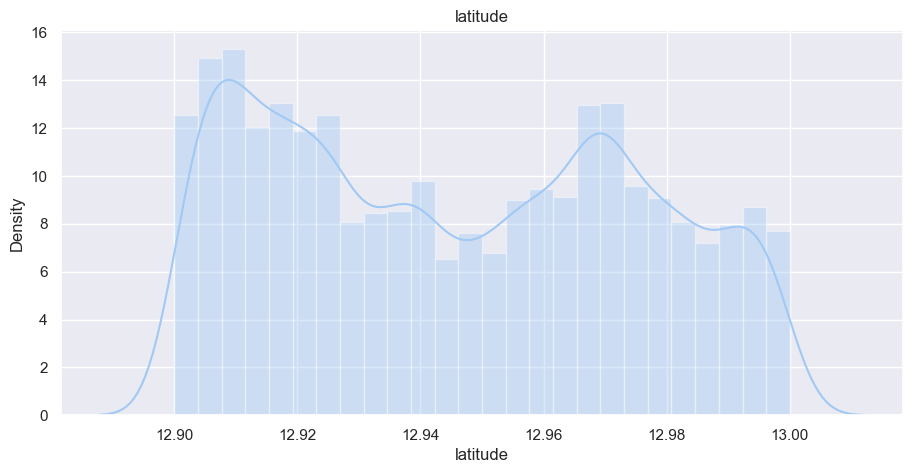

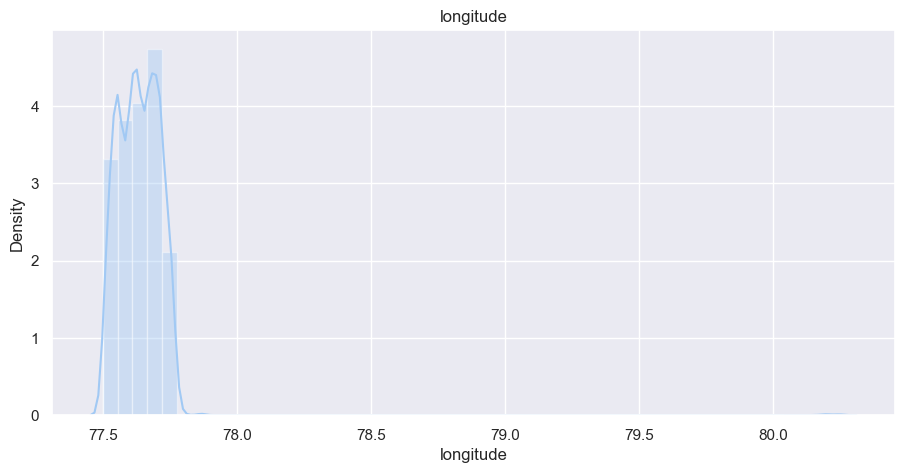

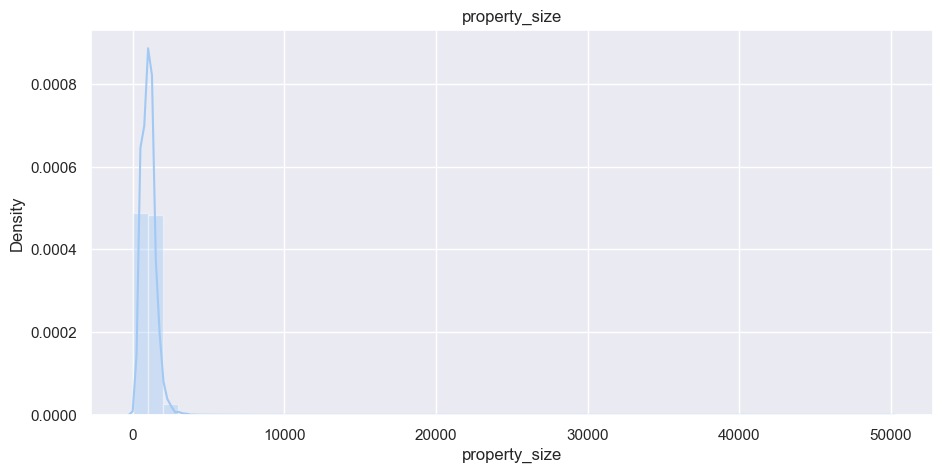

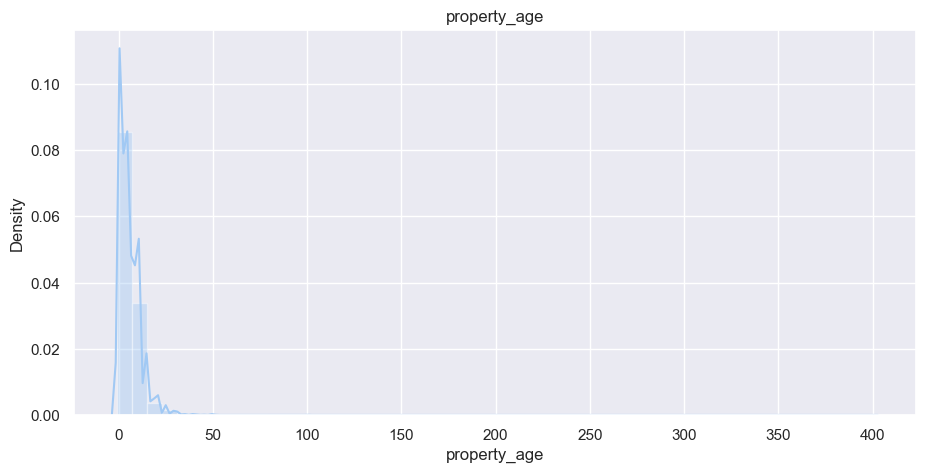

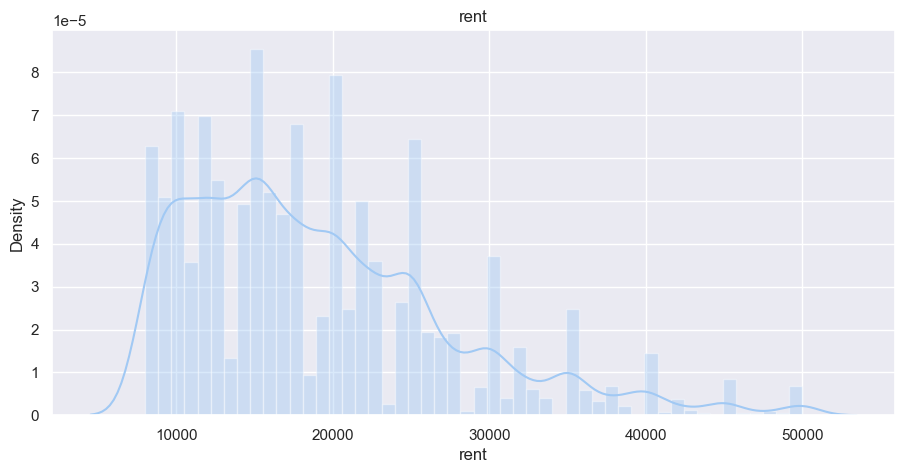

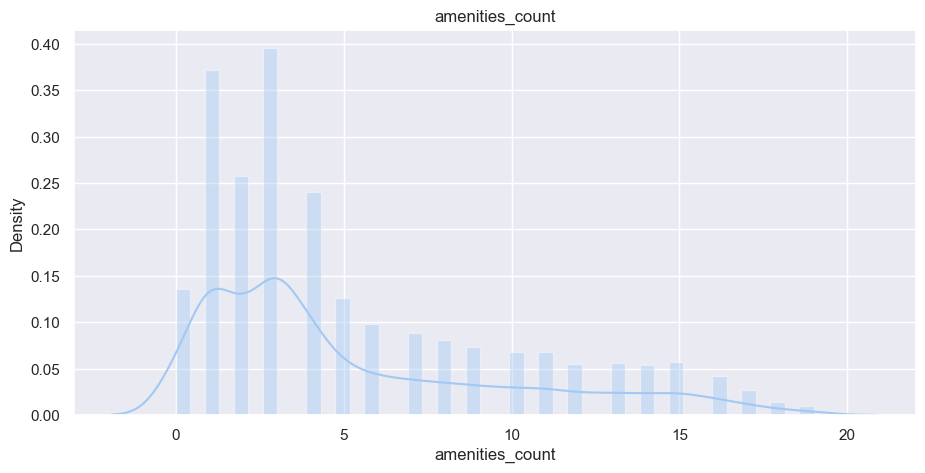

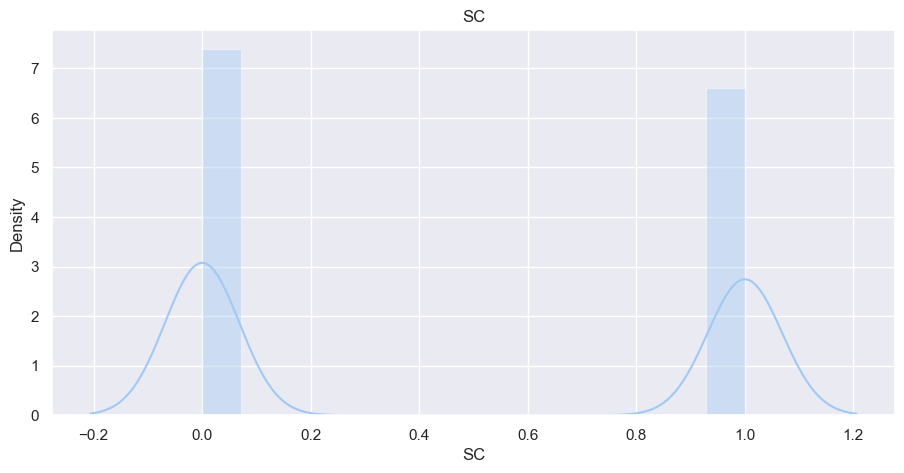

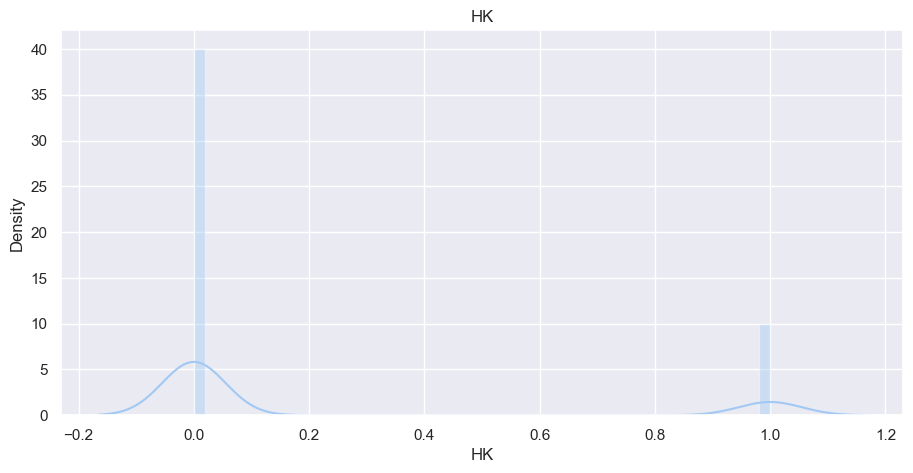

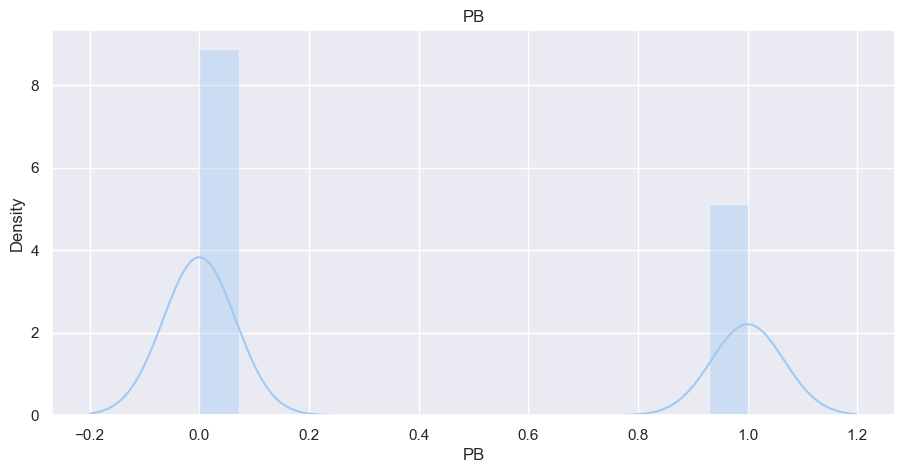

In [131]:
for column in numerical:
    plt.figure(figsize=(50,5))
    plt.subplot(141)
    sns.distplot(df[column],kde = True)

    plt.title(column)
  

- Latitudes range between 12.9 and 13.
- Longitudes range from 77.5 to 80
- Standard deviation is more for longitude compared to latitude.
- Most of the properties have age in the range of 0 to 20
- There are some outliers in property age.
- Most of the properties has rent rate between 10000 and 30000
- Majoriy of porperties hase size in the range of 0-3000
- Features like property age and property age are right skewed indicating the presence of outliers.


# Bivariate analysis

In [132]:
type_order = df.groupby('type')['rent'].mean().reset_index().sort_values('rent')['type']
locality_order = df.groupby('locality')['rent'].mean().reset_index().sort_values('rent')['locality']

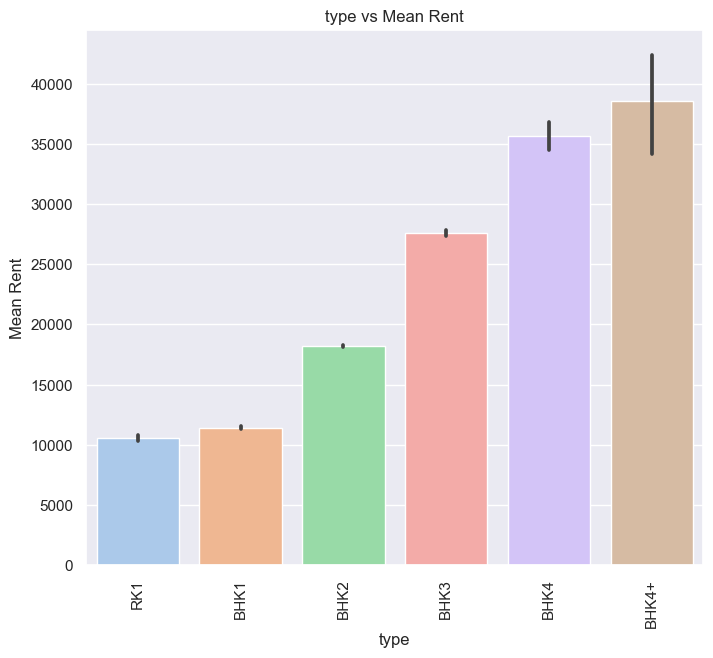

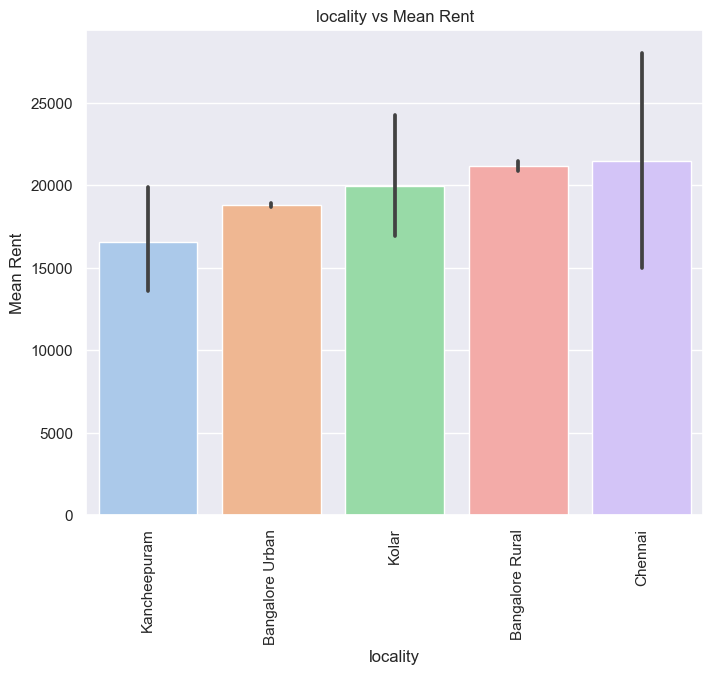

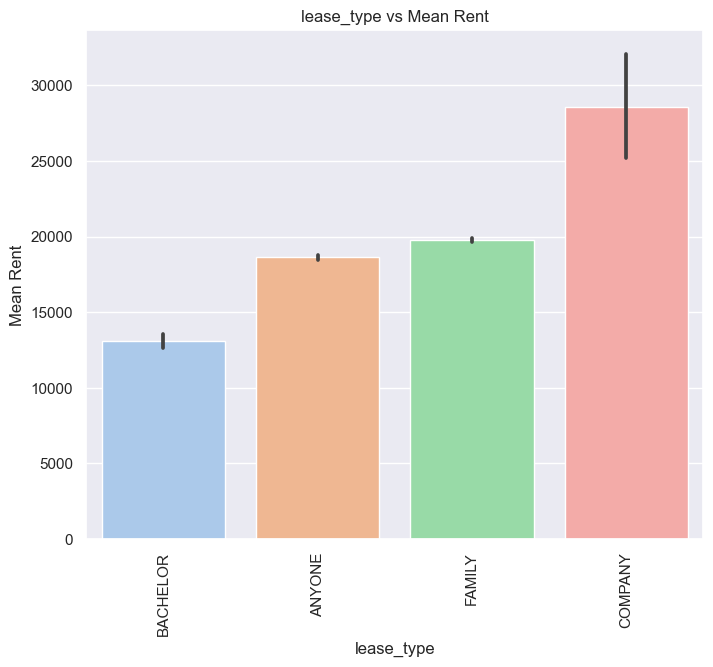

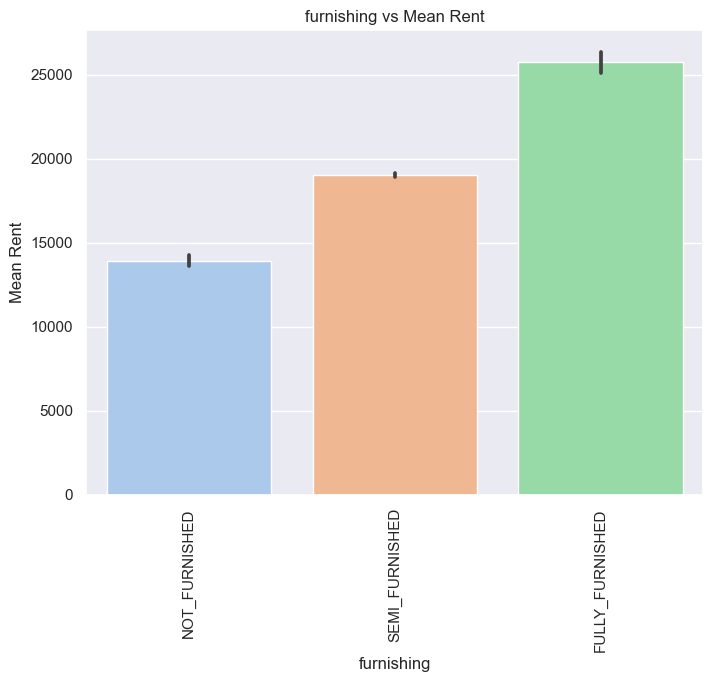

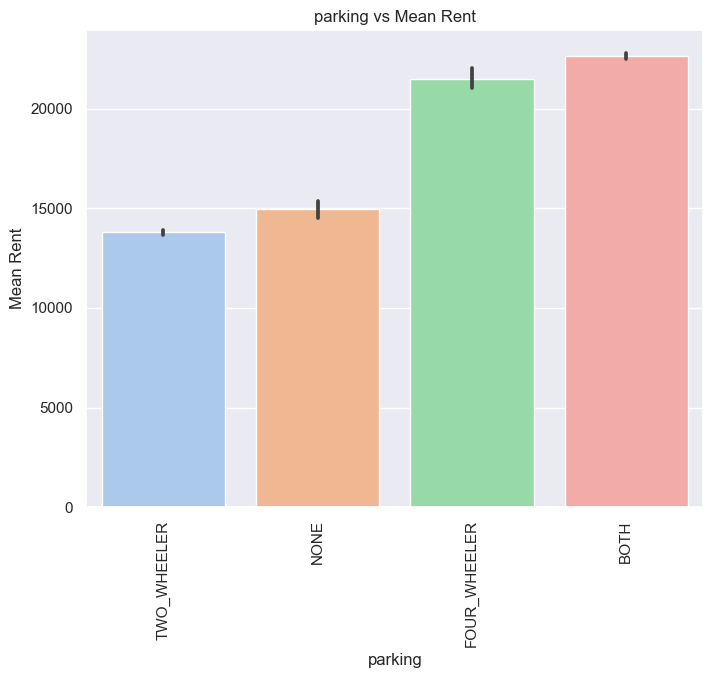

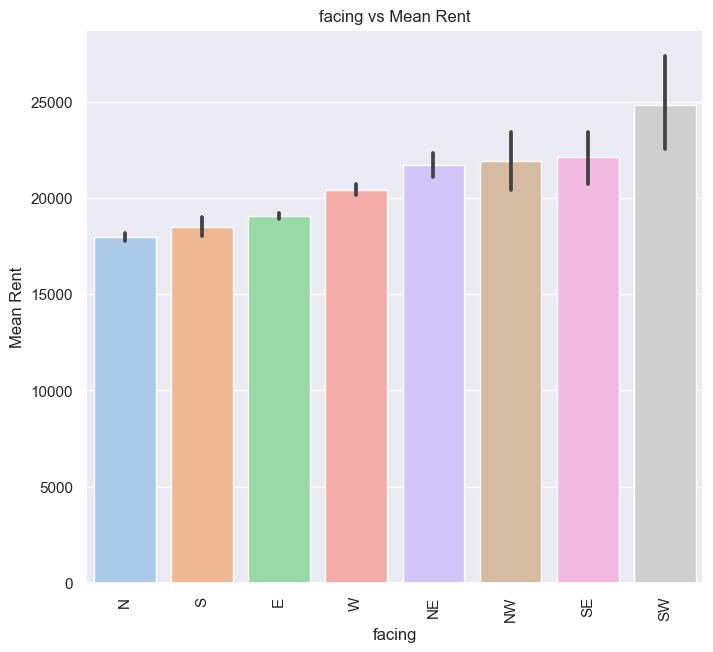

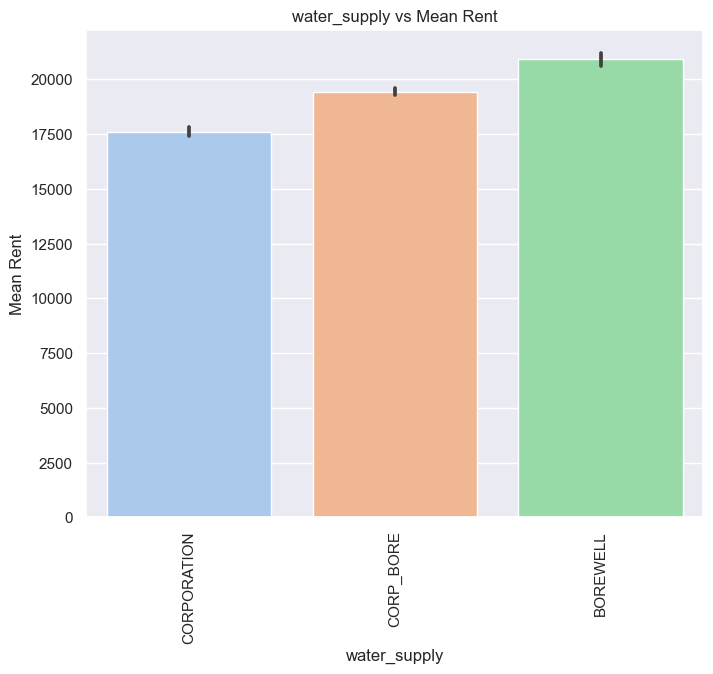

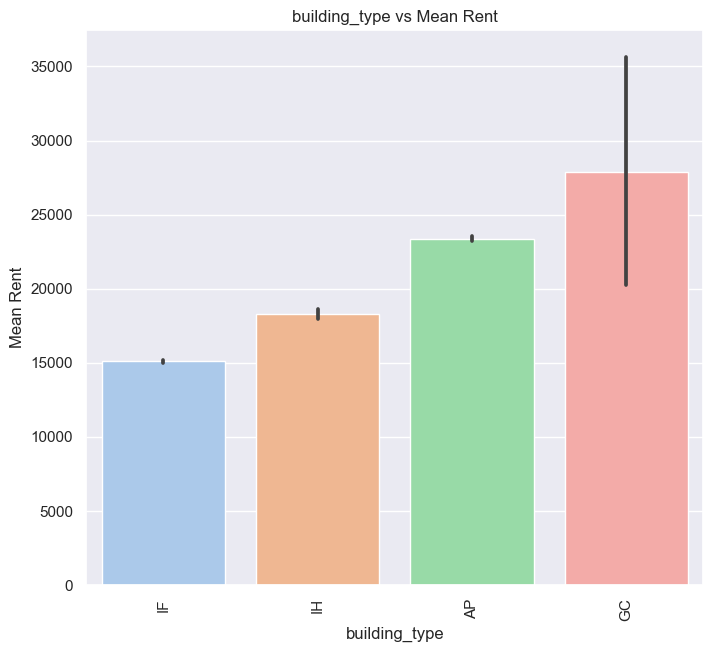

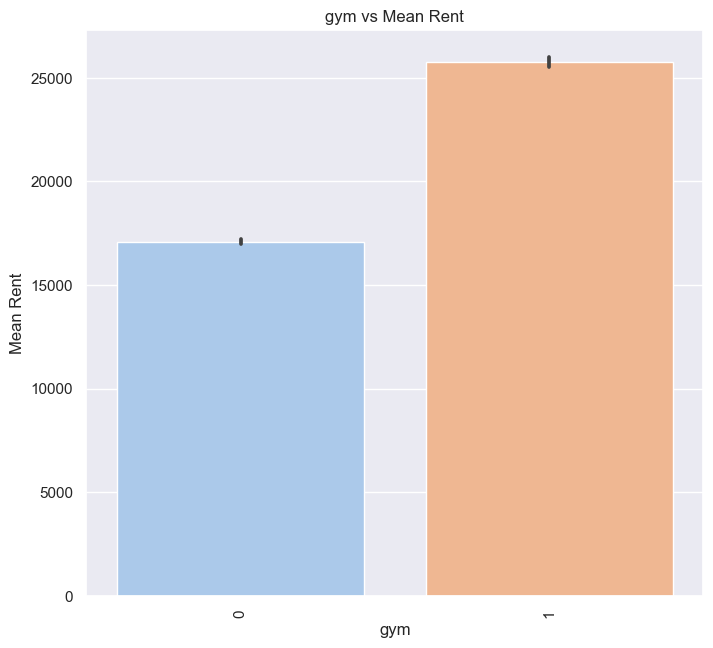

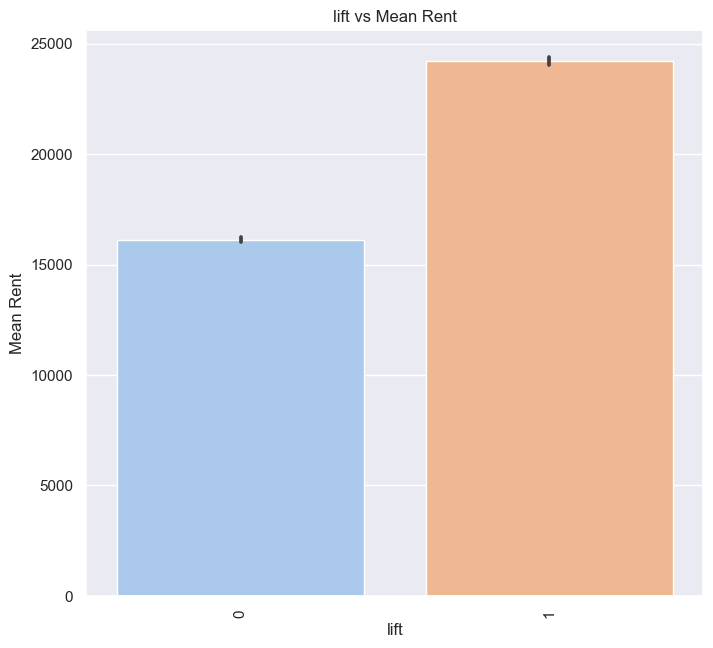

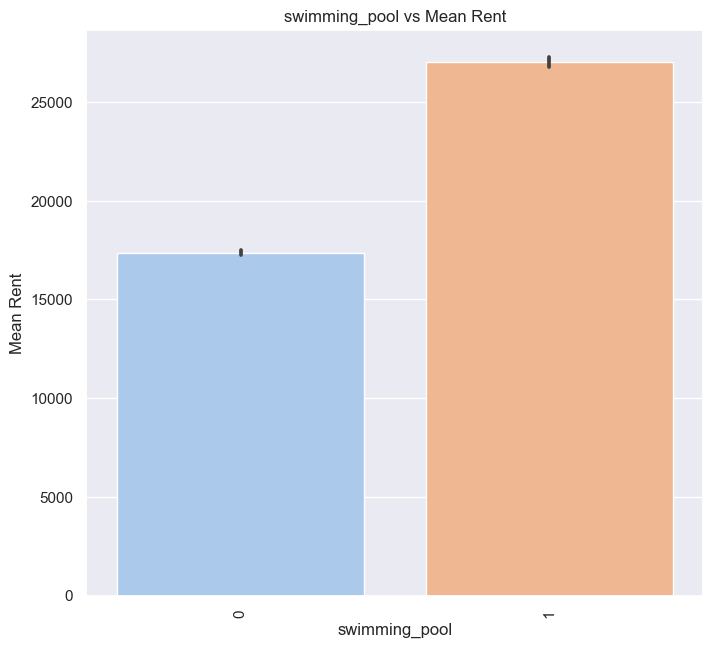

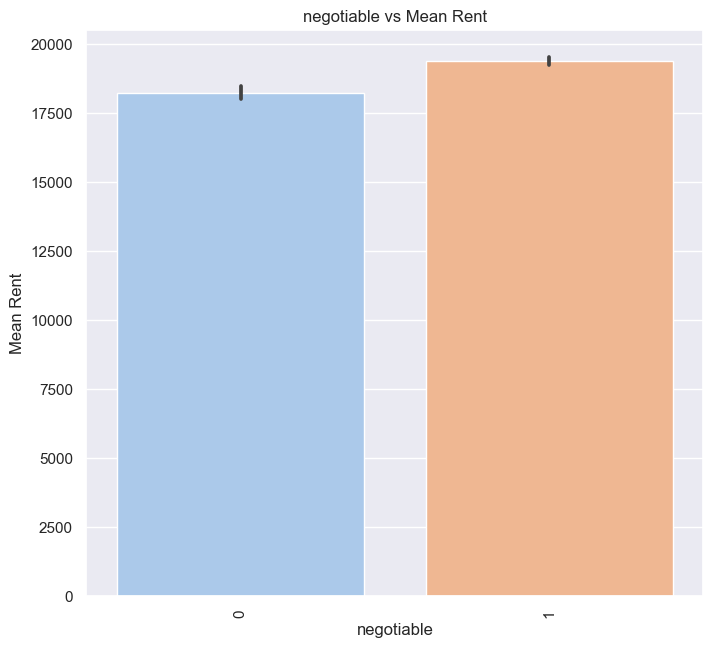

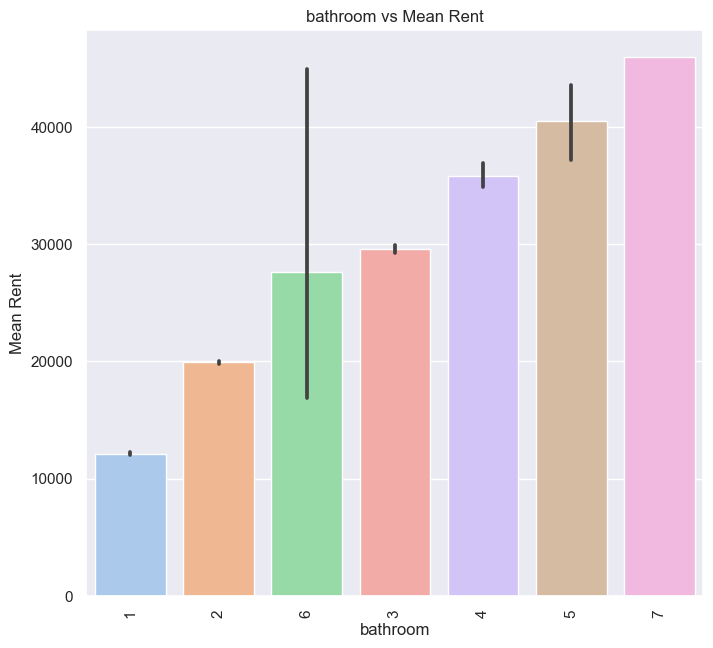

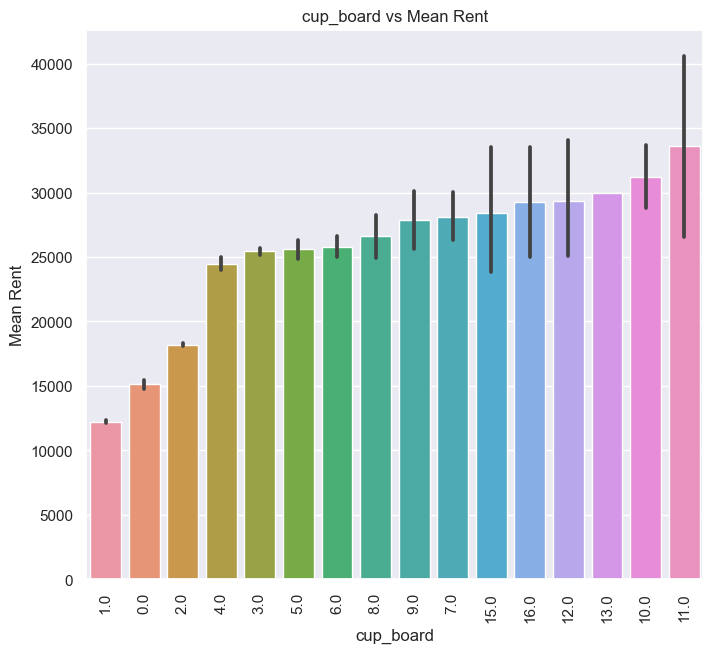

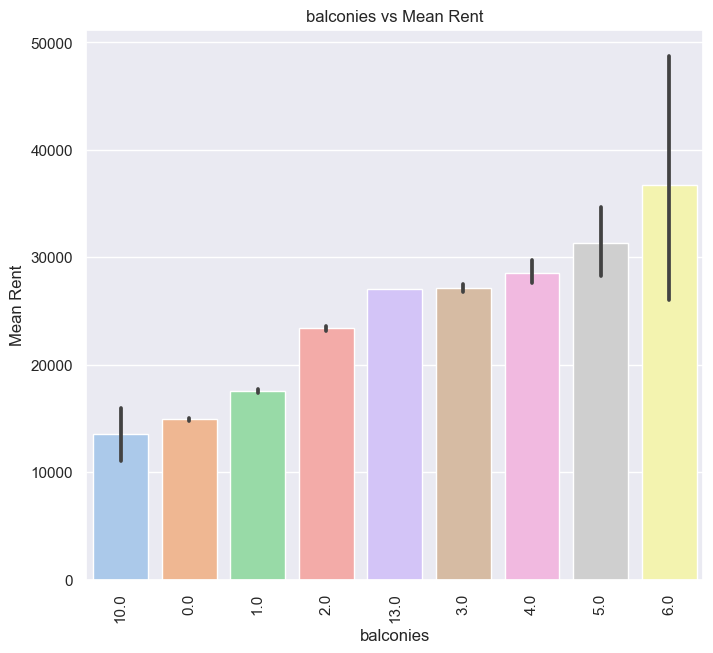

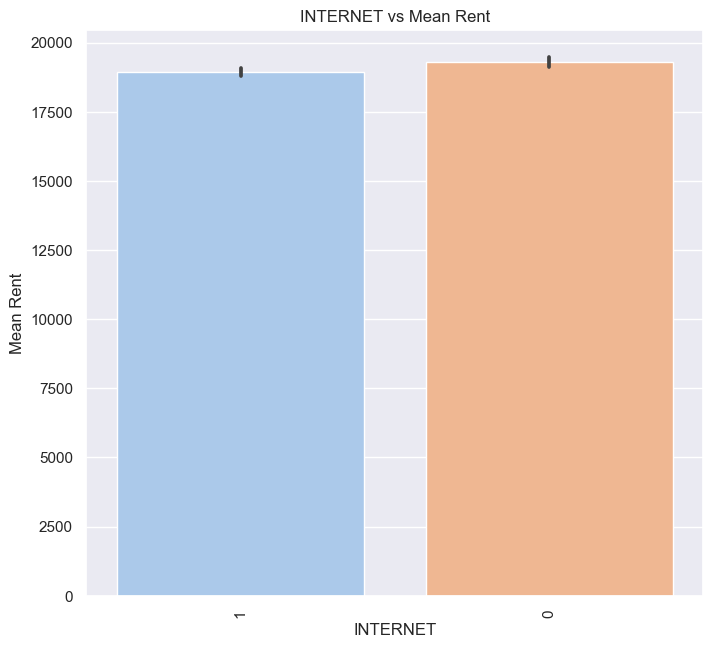

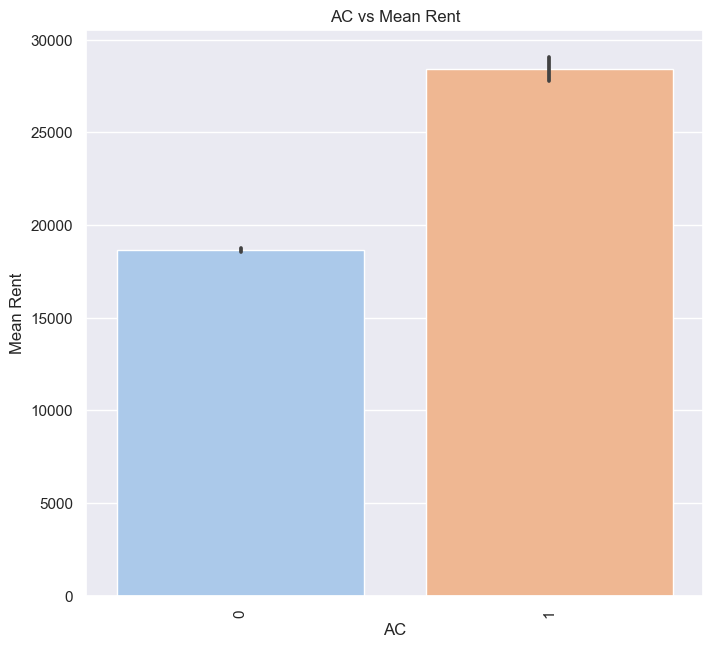

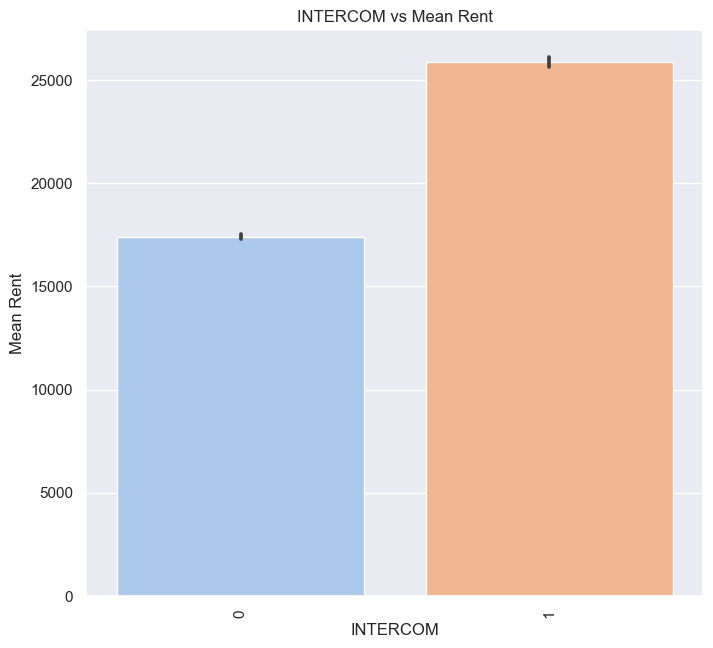

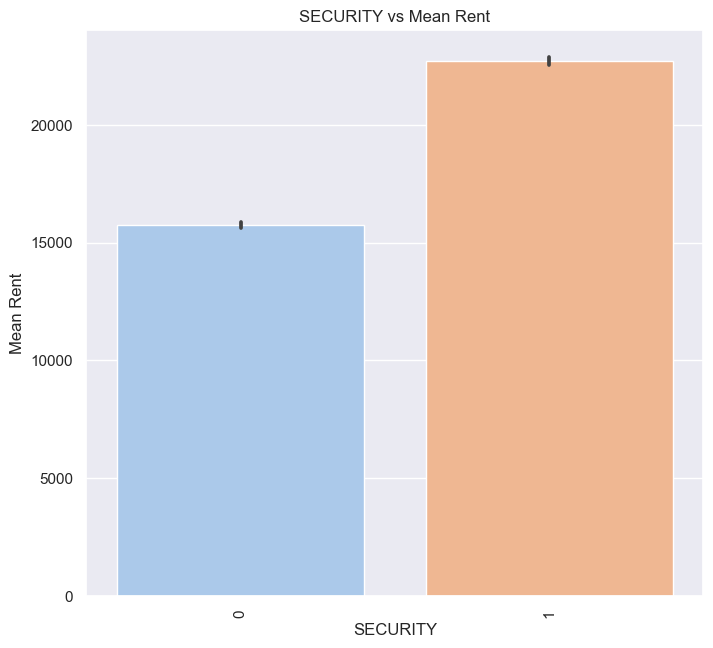

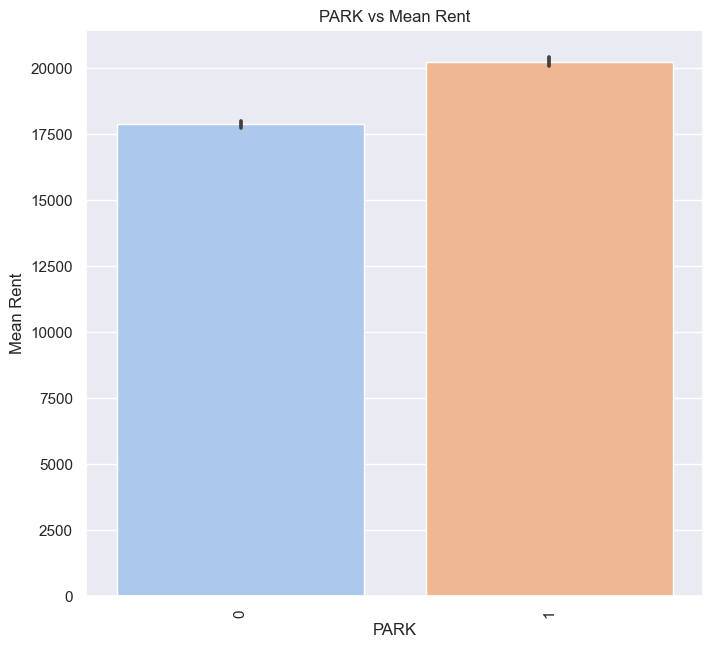

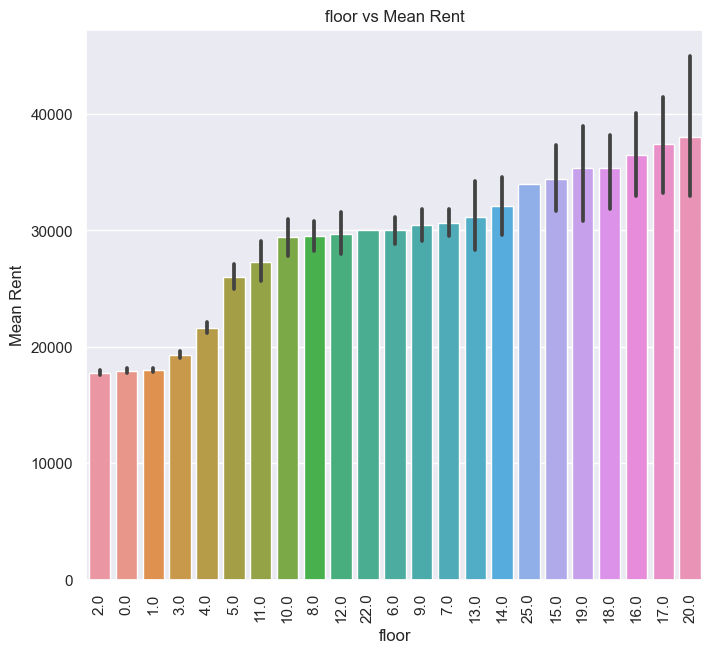

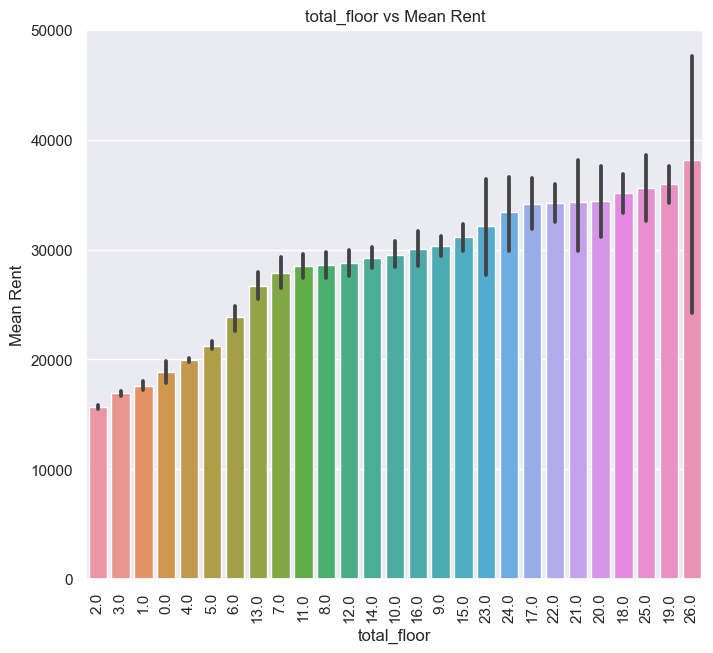

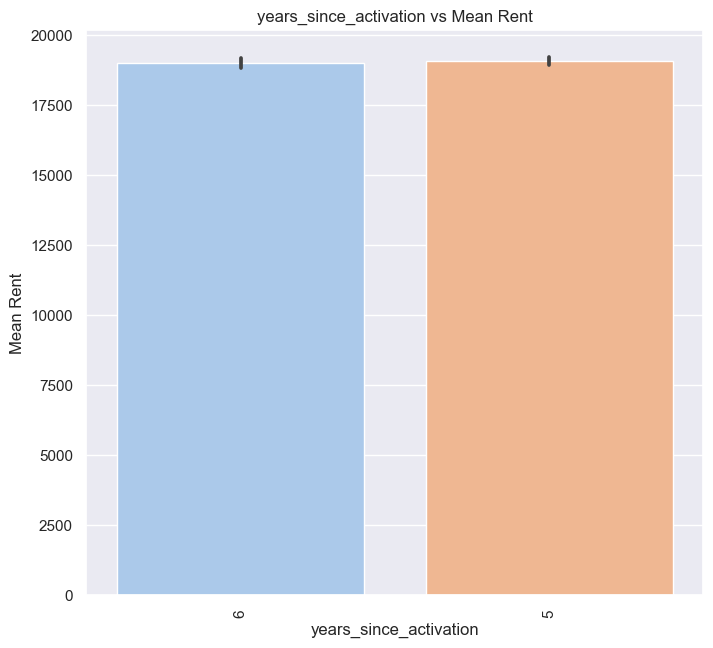

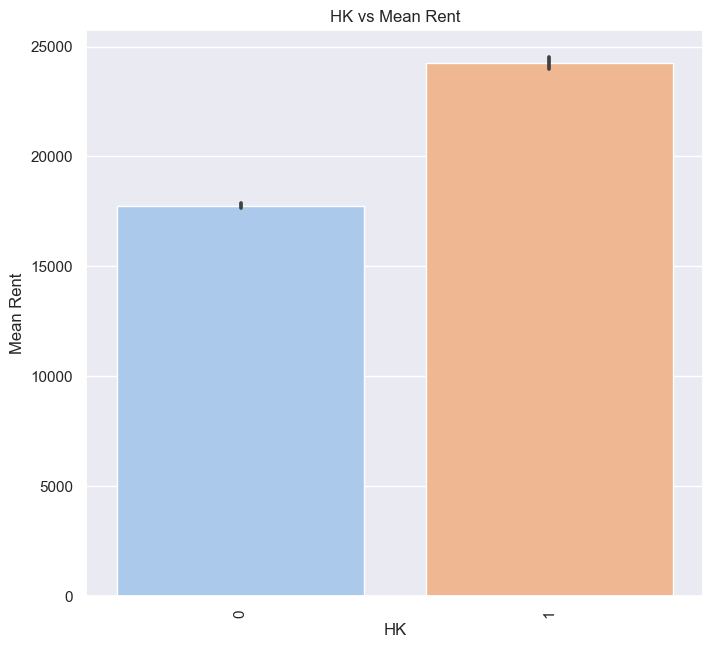

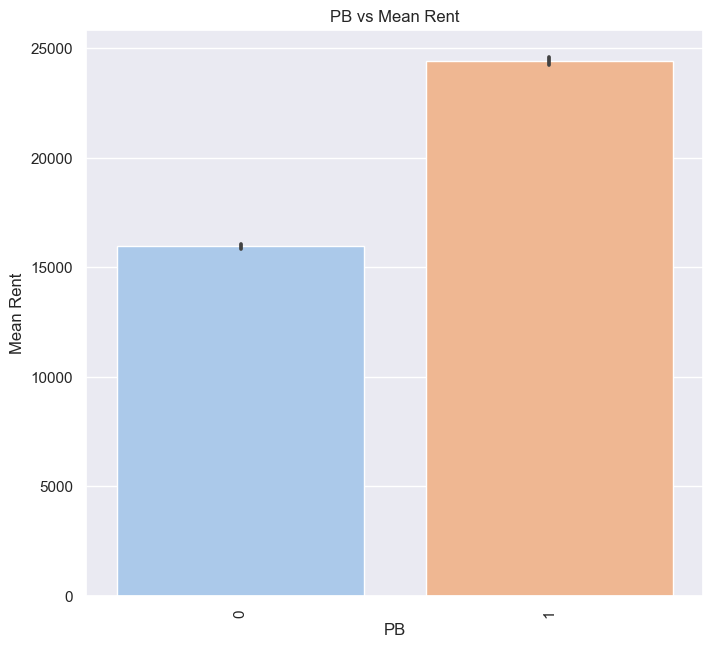

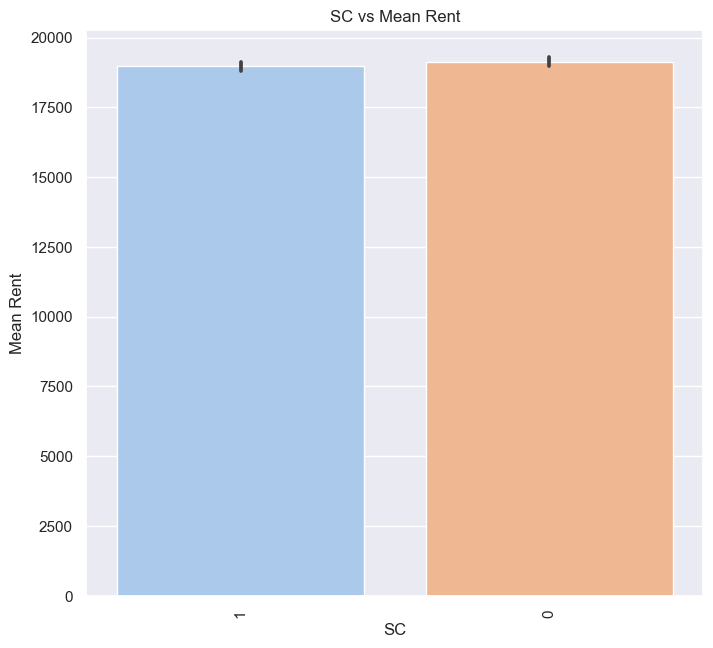

In [133]:
for column in categorical:
    order = df.groupby(column)['rent'].mean().reset_index().sort_values('rent')[column]
    plt.figure(figsize = (20,25))
    
    i=431
    plt.subplot(i)
    sns.barplot(x=df[column],y=df['rent'],order = order)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel("Mean Rent")
    plt.title(column + " vs Mean Rent")
    
    plt.tight_layout()
    i+=1
    

- As expected mean rent is highest for BHK4+ properties and lowest for RK1
- There is no huge differences in mean rent across localities. Still Chennai has the largset average rent and kancheeouram has the lowest.
- Mean price is lowest for properties given for rent amoang batchelors. Average rent for lease given to companies are considerably higher than others.
- Fully furnished properties have the highest average rent and properties with no furnishing has lowest average rent. This is expected since demand for fully furnished properties will be higher.
- Average rent is highest for properties having parking facility for both 2 wheeler and 4 wheeler. This is expected but average rent for properties having no parking facilities is higher than that of properties having only 2 wheeler parking which is usually not the case.
- There are no considerable difference between properties' orientation still properties facing SW has highest demand and those facing N has lowest demand.
- Properties with borewell as a water source has higher average rent and those having corperate water has lowest average rent.
- Building type IF has the lowest average rent and GC has the highest average rate
- Average rent of properties having amenities like gym,lift, swimming pool, AC, intercom, security are considerably higher than those not having these amenities. This is expected because the more the amenities, more will be the price of property
- Properties activated during 2017 and 2018 have more or less the same average rent.
- Surprisingly the average rent for properties having no internet is slightly higher than those having internet.

In [134]:
li = ['cup_board','bathroom','balconies','floor','total_floor']

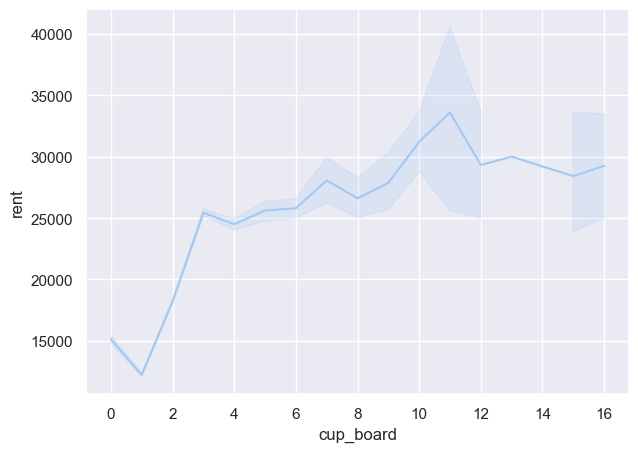

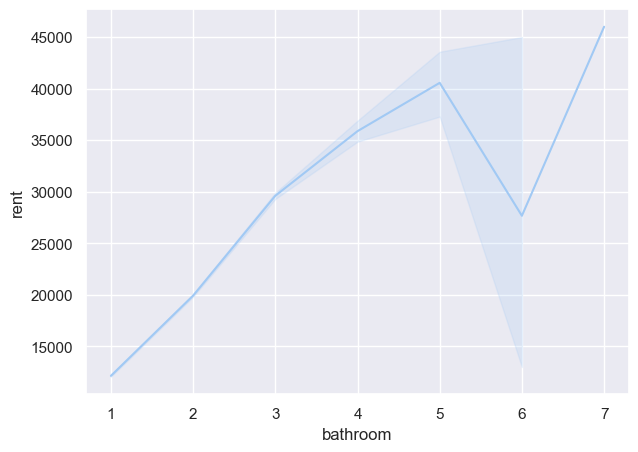

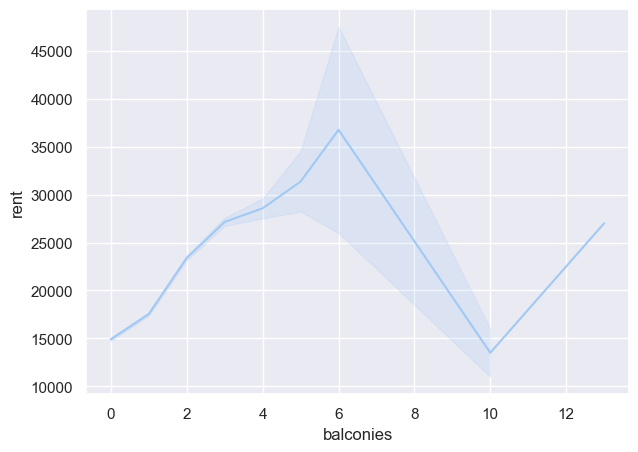

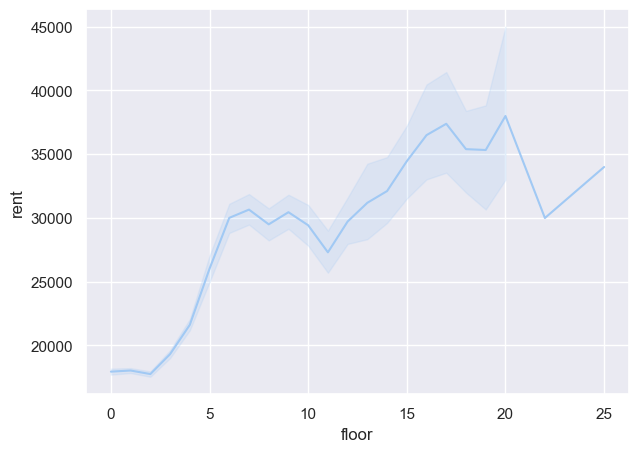

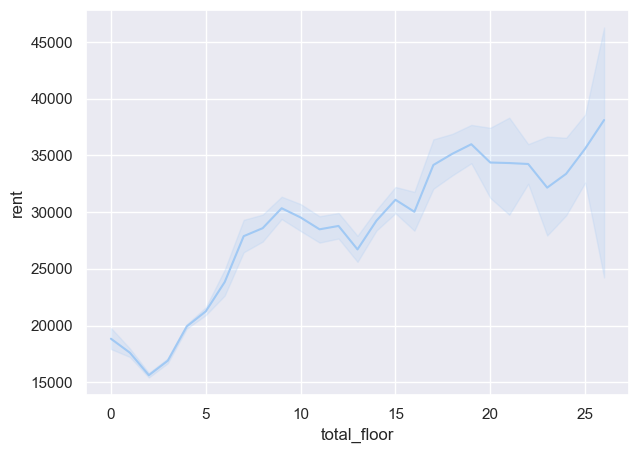

In [135]:
for column in li:
    plt.figure(figsize=(7,5))
    sns.lineplot(df[column],df['rent'])

- Average rent and number of cupboards have a rough irregular linear relationship.
- Rent increases with increse in numer of bathrooms except for the rent of properties with 6 bathrooms.
- Floor also has a very rough linear relation with rent.
- Total floor has a non uniform relaton with rent.
- Number of balconies also does not have a goot linear relation with rent.

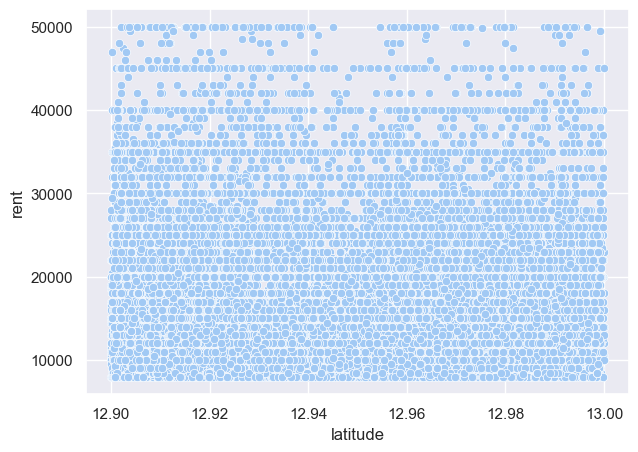

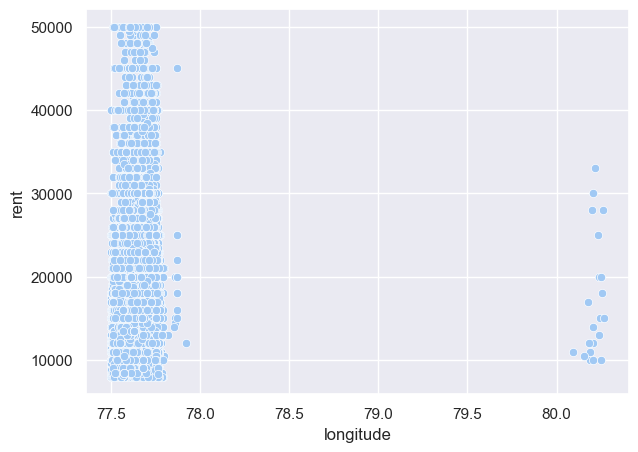

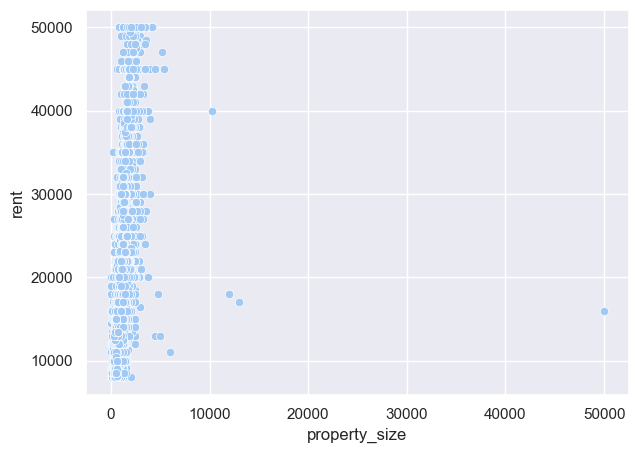

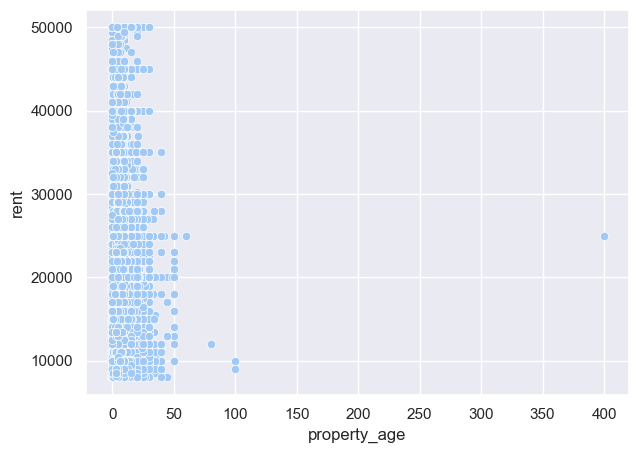

In [136]:
float_li = ['latitude','longitude','property_size','property_age']
for col in float_li:
    plt.figure(figsize = (7,5))
    sns.scatterplot(df[col],df['rent'])

- It is clear from the figures that none of this property has a linear association with the target variable.
- Also there are outliers present in property age and property size.

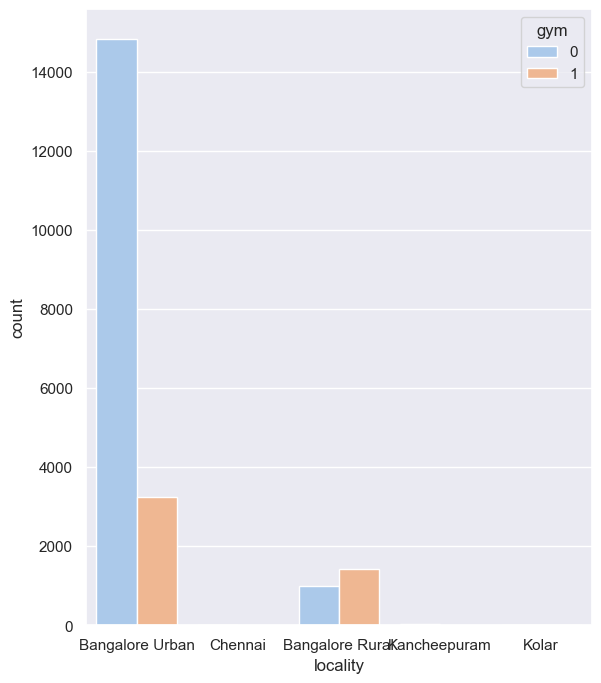

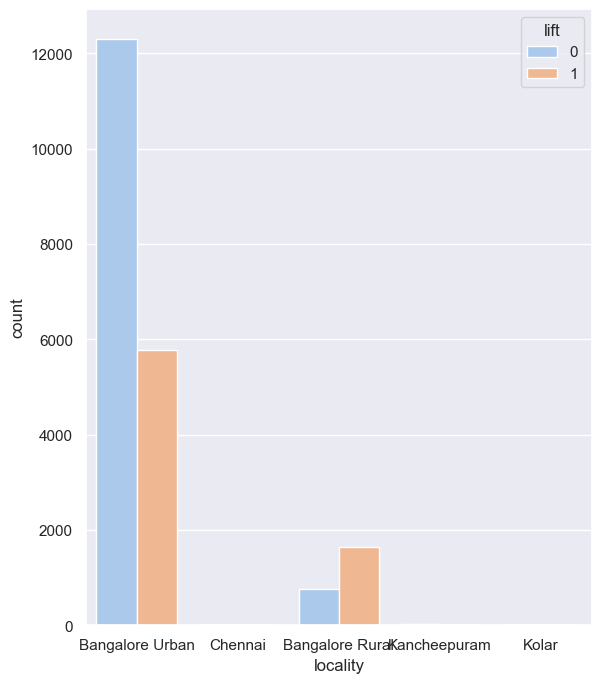

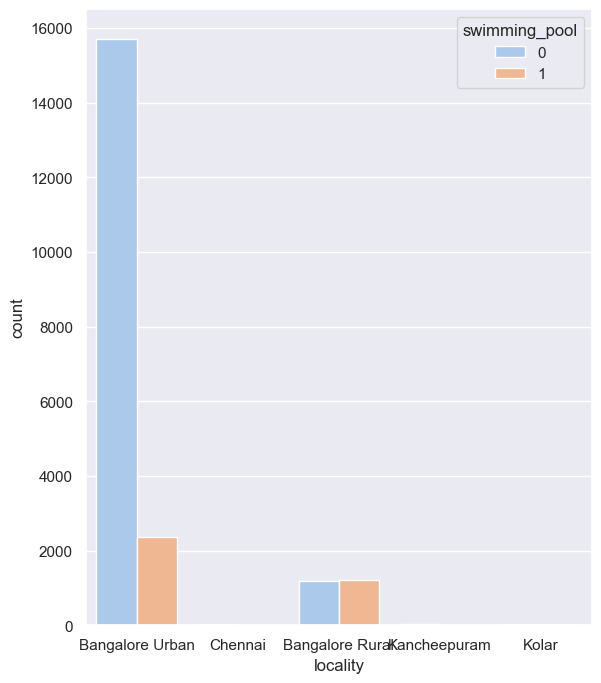

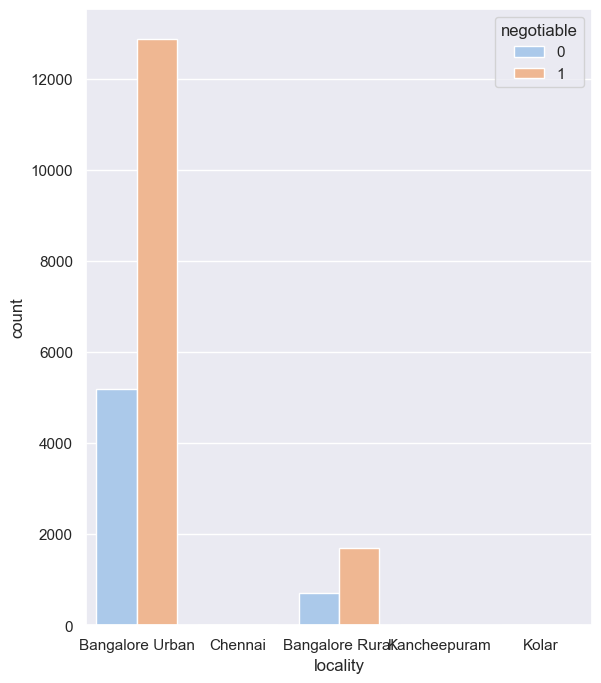

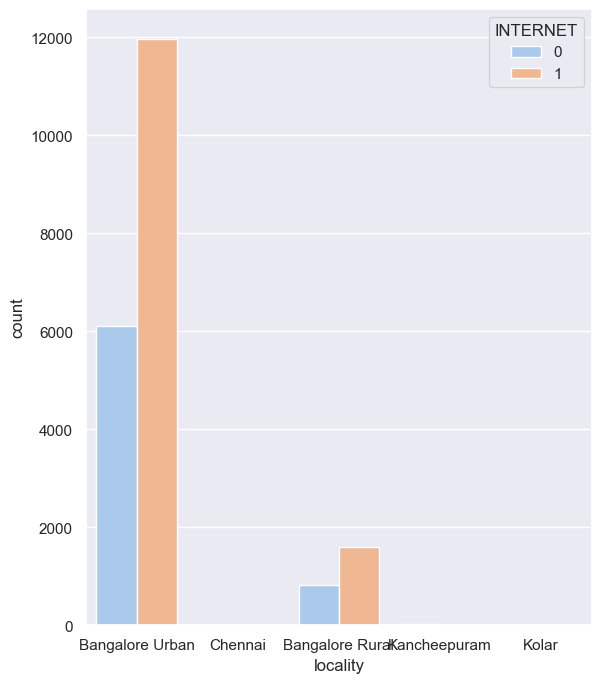

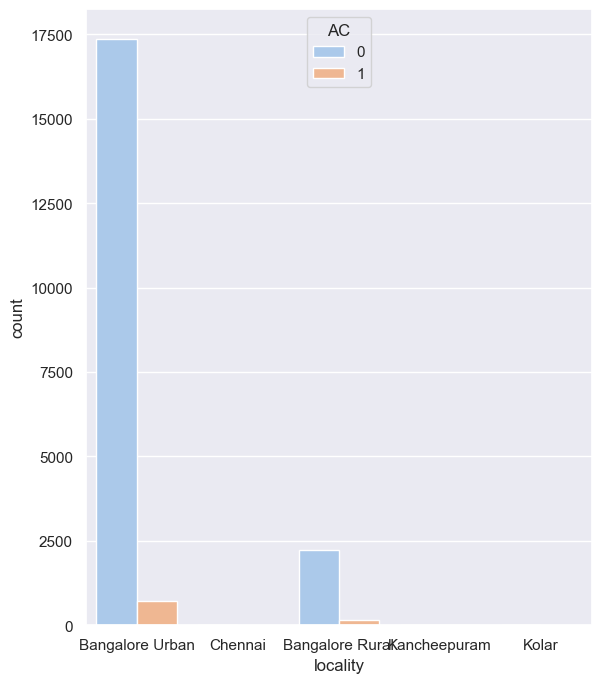

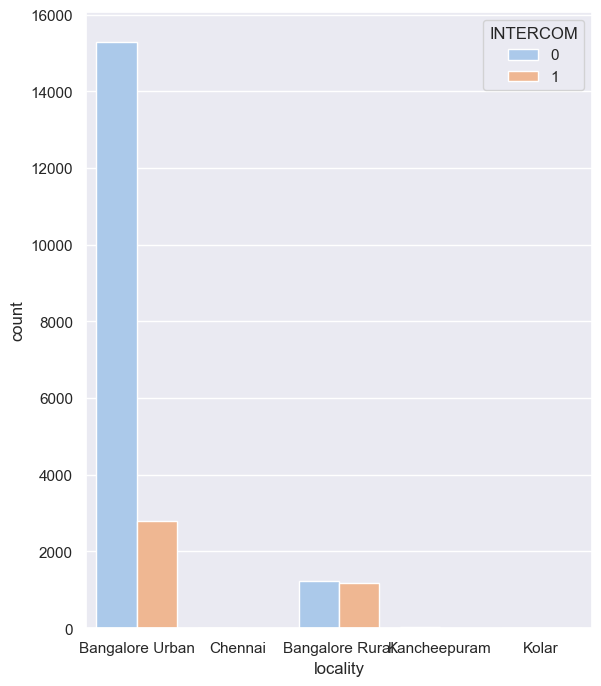

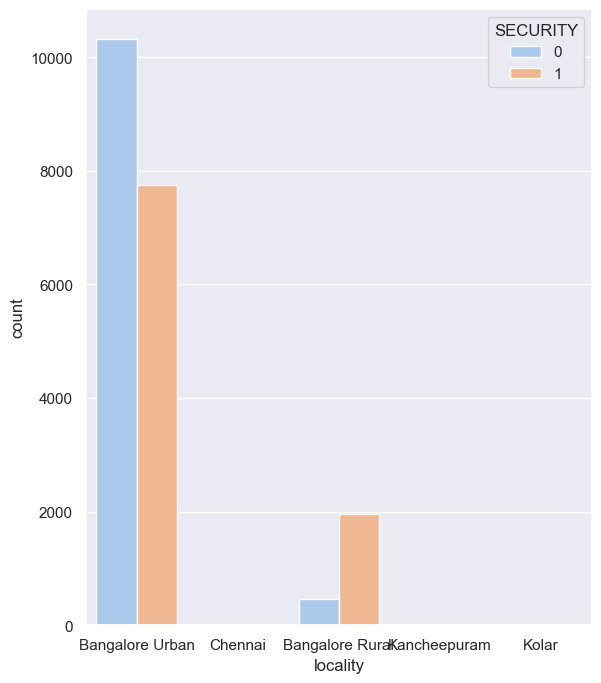

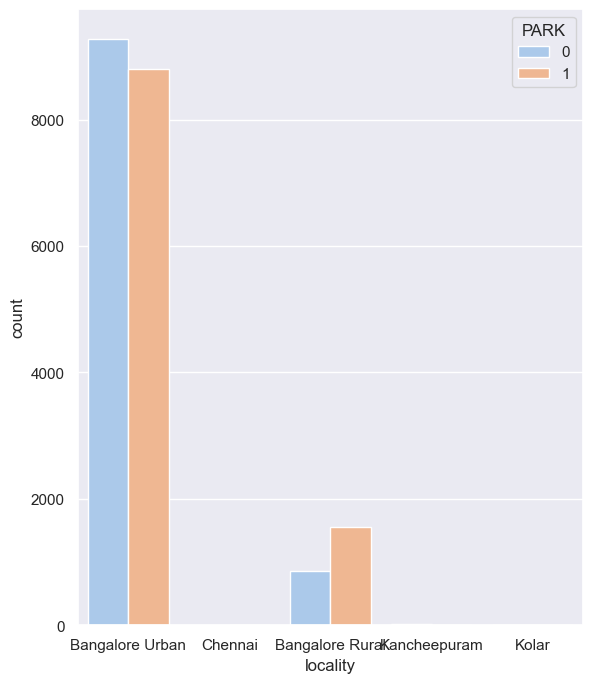

In [137]:
cat = ['gym','lift','swimming_pool','negotiable','INTERNET','AC','INTERCOM','SECURITY','PARK']
for column in cat:
    plt.figure(figsize=(30,8))
    ax = plt.subplot(141)
    sns.countplot(x=df['locality'],hue=df[column])
  

- Most of the amenities like gym, pool, park etc are only available in properties in bangalore urban and rural. These facilities are almost unseen in chennai, kolar and kancheepuram. One reason for this may be that w have taken only small amount of data from localities other than bangalore urban and bangalore rural.


# Removing Outliers

<AxesSubplot:xlabel='property_size'>

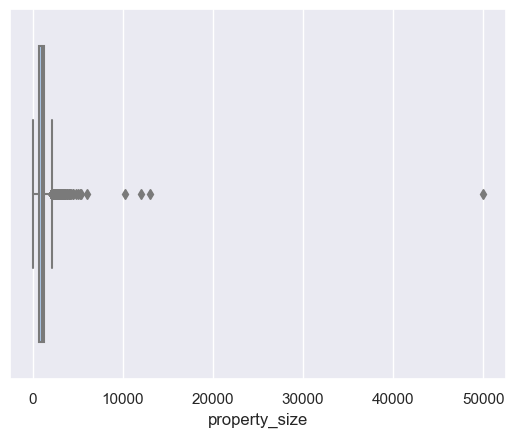

In [138]:
sns.boxplot(df['property_size'])


<AxesSubplot:xlabel='property_age'>

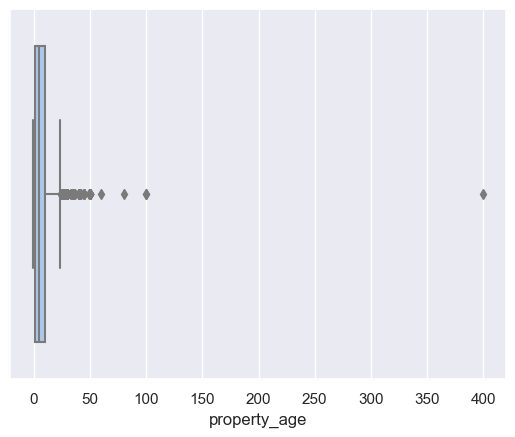

In [139]:
sns.boxplot(df['property_age'])


In [140]:

q1 = np.percentile(df['property_size'],25)
q3 = np.percentile(df['property_size'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
df['property_size'] = df['property_size'].clip(lower,upper)

In [141]:

q1 = np.percentile(df['property_age'],25)
q3 = np.percentile(df['property_age'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
df['property_age'] = df['property_age'].clip(lower,upper)

<AxesSubplot:xlabel='property_size'>

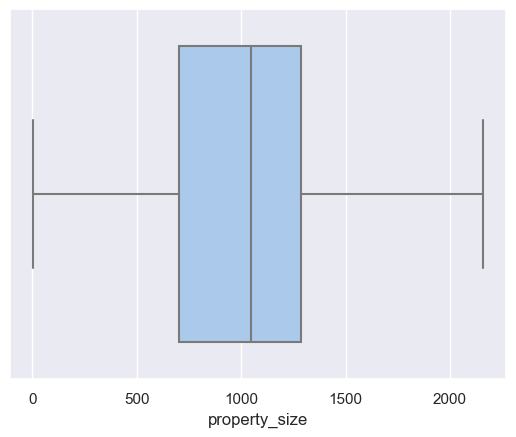

In [142]:
sns.boxplot(df['property_size'])

<AxesSubplot:xlabel='property_size'>

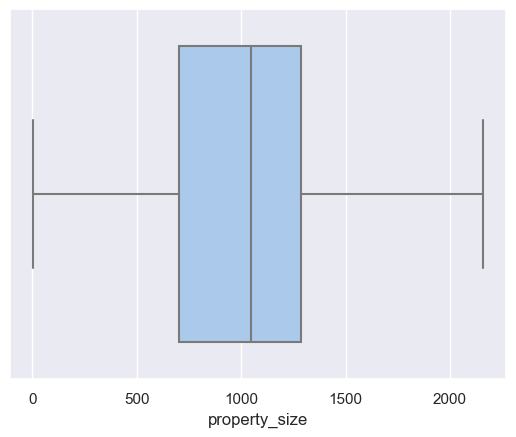

In [143]:
sns.boxplot(df['property_size'])

# Encoding

In [144]:
df['locality'] = df['locality'].map({'Kancheepuram':0,'Bangalore Urban':1,'Kolar':2, 'Bangalore Rural':3,'Chennai':4})
df['furnishing'] = df['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
df['water_supply'] = df['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
df['building_type'] = df['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})
df['parking'] = df['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':5,'BOTH':6})
df = pd.get_dummies(df,columns = ['type','lease_type','facing'])

In [145]:
df.columns

Index(['locality', 'activation_date', 'latitude', 'longitude', 'gym', 'lift',
       'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size',
       'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'amenities_count',
       'INTERNET', 'AC', 'INTERCOM', 'FS', 'SECURITY', 'SC', 'PARK', 'HK',
       'PB', 'years_since_activation', 'type_BHK1', 'type_BHK2', 'type_BHK3',
       'type_BHK4', 'type_BHK4+', 'type_RK1', 'lease_type_ANYONE',
       'lease_type_BACHELOR', 'lease_type_COMPANY', 'lease_type_FAMILY',
       'facing_E', 'facing_N', 'facing_NE', 'facing_NW', 'facing_S',
       'facing_SE', 'facing_SW', 'facing_W'],
      dtype='object')

# Splitting

In [146]:
X = df.drop('rent',axis=1)
y = df['rent']

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

# Scaling 

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20532 entries, 0 to 20531
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   locality                20532 non-null  int64  
 1   activation_date         20532 non-null  int64  
 2   latitude                20532 non-null  float64
 3   longitude               20532 non-null  float64
 4   gym                     20532 non-null  int64  
 5   lift                    20532 non-null  int64  
 6   swimming_pool           20532 non-null  int64  
 7   negotiable              20532 non-null  int64  
 8   furnishing              20532 non-null  int64  
 9   parking                 20532 non-null  int64  
 10  property_size           20532 non-null  float64
 11  property_age            20532 non-null  float64
 12  bathroom                20532 non-null  int32  
 13  cup_board               20532 non-null  float64
 14  floor                   20532 non-null

# Model Building

## Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression 
linear_model = LinearRegression(fit_intercept=True) 
linear_model.fit(X_train_scaled,y_train) 
print(linear_model.predict(X_test_scaled))     
print(y_test)

[39156.38370534 11721.38370534 13108.25870534 ... 21609.38370534
 23024.38370534  8853.00870534]
13694    26000.0
9379     12000.0
934      18000.0
7224      8000.0
4549     11000.0
          ...   
16092    20000.0
13184    30000.0
9309     18000.0
16756    23000.0
8375      9000.0
Name: rent, Length: 4107, dtype: float64


In [156]:
linear_model.score(X_test_scaled, y_test)

0.6897084039886734

In [157]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.6951164787614509

## Decision Tree Regressor

In [158]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
    dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
    dt_regressor.fit(X_train,y_train)
    print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
    cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())



Depth :  1  train Score  :  0.3870996716725985 cross_val_score :  0.37875646047212597
Depth :  2  train Score  :  0.5596044918997634 cross_val_score :  0.5502871368807634
Depth :  3  train Score  :  0.6245875343534835 cross_val_score :  0.6148081589816041
Depth :  4  train Score  :  0.6573725833297135 cross_val_score :  0.6506518809053408
Depth :  5  train Score  :  0.688329772531225 cross_val_score :  0.6767030436808177
Depth :  6  train Score  :  0.7170823714196922 cross_val_score :  0.6910945291345828
Depth :  7  train Score  :  0.7461838274046337 cross_val_score :  0.7078777824155118
Depth :  8  train Score  :  0.7748950802986133 cross_val_score :  0.7158651766337347
Depth :  9  train Score  :  0.8048804835419975 cross_val_score :  0.7186882965475174
Depth :  10  train Score  :  0.8338654790554574 cross_val_score :  0.71235514449797
Depth :  11  train Score  :  0.8621256700361803 cross_val_score :  0.701131427086174
Depth :  12  train Score  :  0.8865792474679386 cross_val_score : 

In [159]:
dt_regressor= DecisionTreeRegressor(max_depth=9, random_state=0)
dt_regressor.fit(X_train,y_train)
dt_regressor.score(X_train,y_train)

0.8048804835419975

In [179]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
10,0.732398,property_size
3,0.122755,longitude
12,0.026269,bathroom
2,0.024171,latitude
15,0.020910,total_floor
8,0.013824,furnishing
32,0.008764,type_BHK2
31,0.005649,type_BHK1
11,0.005550,property_age
5,0.005515,lift


### Random Forest

In [161]:
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth: 
    rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
    rf_regressor.fit(X_train,y_train)
    cross_value_score = cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean()
    print("Depth : ", d, "cross_val_score : ", cross_value_score)
    cross_val_rf.append(cross_value_score)

Depth :  2 cross_val_score :  0.5763508120882419
Depth :  4 cross_val_score :  0.6738146171626821
Depth :  8 cross_val_score :  0.7665468144903778
Depth :  10 cross_val_score :  0.7879367779419483
Depth :  11 cross_val_score :  0.7943893166505823
Depth :  12 cross_val_score :  0.7989961846733552
Depth :  13 cross_val_score :  0.8016715928335614
Depth :  15 cross_val_score :  0.8051727798047834
Depth :  18 cross_val_score :  0.8060723766002572
Depth :  20 cross_val_score :  0.8068161688444924


In [162]:
rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [165]:
rf_regressor.score(X_test,y_test)

0.7949222177191646

### XGB Regressor

In [167]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
    xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
    xgb_regressor.fit(X_train,y_train)
    print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
    cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.6365822251689882
Learning rate :  0.05 cross_val_score: 0.8090259321052539
Learning rate :  0.08 cross_val_score: 0.8194906568494519
Learning rate :  0.1 cross_val_score: 0.8213304497397976
Learning rate :  0.2 cross_val_score: 0.8238758336183464
Learning rate :  0.25 cross_val_score: 0.8198389116662658
Learning rate :  0.3 cross_val_score: 0.8190675114068822


In [169]:
xgb_regressor= xgb.XGBRegressor(learning_rate = 0.25,n_estimators=100)
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [170]:
xgb_regressor.score(X_test,y_test)

0.8137050748337047

In [173]:
from sklearn.metrics import r2_score

In [176]:
y_pred_lr=linear_model.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [177]:
R2_score_lr=r2_score(y_test,y_pred_lr)
# R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [178]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
# print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.6882826893597334
R2 Score for Decision Tree Regression Model:  0.7120409779699138
R2 Score for Random Forest Regression Model:  0.7949222177191646
R2 Score for Extreme-Gradient Boosting Regression Model:  0.8137050748337047


Best model is when using xgb regressor

# Feature Importance 

In [180]:
xgb_regressor.feature_importances_

array([0.00299727, 0.00395166, 0.01221376, 0.03834853, 0.00591724,
       0.02764629, 0.02597892, 0.00433779, 0.03274451, 0.02770645,
       0.28063405, 0.00726281, 0.08428659, 0.02195942, 0.00523375,
       0.02596212, 0.00402697, 0.01406174, 0.0049441 , 0.0116455 ,
       0.00455596, 0.02675181, 0.00446173, 0.00397645, 0.0089881 ,
       0.00463609, 0.00404526, 0.00429136, 0.03245535, 0.        ,
       0.02715106, 0.02731442, 0.04727203, 0.0294995 , 0.02246404,
       0.01407017, 0.00500716, 0.01334811, 0.02348595, 0.00605587,
       0.00477795, 0.00390271, 0.00979678, 0.00234392, 0.00606991,
       0.00683076, 0.00856883, 0.00601933], dtype=float32)

In [181]:
df.columns

Index(['locality', 'activation_date', 'latitude', 'longitude', 'gym', 'lift',
       'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size',
       'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'amenities_count',
       'INTERNET', 'AC', 'INTERCOM', 'FS', 'SECURITY', 'SC', 'PARK', 'HK',
       'PB', 'years_since_activation', 'type_BHK1', 'type_BHK2', 'type_BHK3',
       'type_BHK4', 'type_BHK4+', 'type_RK1', 'lease_type_ANYONE',
       'lease_type_BACHELOR', 'lease_type_COMPANY', 'lease_type_FAMILY',
       'facing_E', 'facing_N', 'facing_NE', 'facing_NW', 'facing_S',
       'facing_SE', 'facing_SW', 'facing_W'],
      dtype='object')

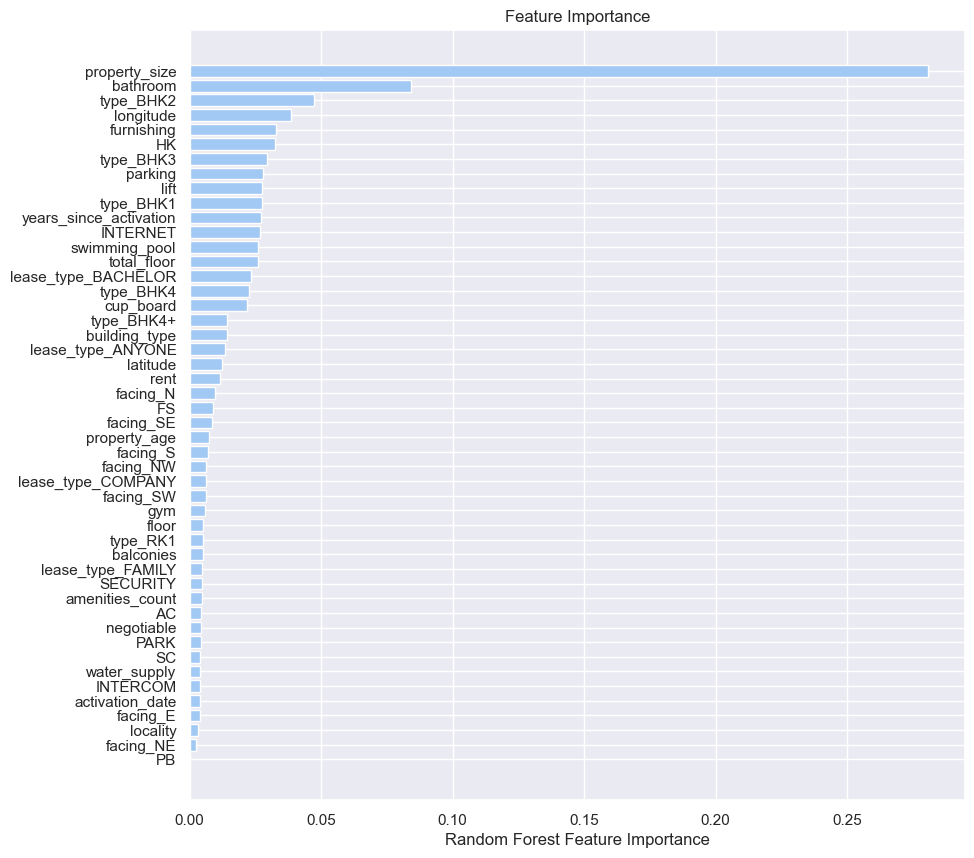

In [183]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()